<a class="anchor" id="0"></a>
# **GROUP 8 BIP A&E Technical Challenge**
​
​
Dear Reader, 

**Our challenge** was to employ machine learning techniques to develop an algorithm that predicts admissions to the hospital's emergency department. This notebook commences with this  <font color="red"><b>Warm Welcome 🤗 </b></font>, followed by a comprehensive table of contents summarizing our efforts. The dedicated efforts of Group 8 members over the past six weeks have been poured into this work. We invite you to explore our journey and hope you find valuable insights within our contributions.
  
  
  
  


<a class="anchor" id="0.1"></a>
# **Table of Contents**



1. [Introduction](#1)
2. [About the dataset](#2)
3. [Data Preprocessing](#3)
   - 3.1 [Data Exploration & Data visualization](#3.1)
   - 3.2 [Data cleaning](#3.2)
   - 3.3 [Encoding Categorical variables](#3.3)
4. [Feature selection (Filter Methods)](#4)
   - 4.1 [Removing constant features](#4.1)
   - 4.2 [Using K-best](#4.2)
   - 4.3 [Correlation-Matrix with Heatmap](#4.3)
5. [Model Training](#5)
   - 5.1 [Logistic Regression with Ridge Regularization](#5.1)
   - 5.2 [Decision Trees](#5.2)
   - 5.3 [Random Forest using GridCV](#5.3)
   - 5.4 [XGBoost](#5.4)
   - 5.5 [K-Nearest Neighbours](#5.5)
   - 5.6 [Deep Neural Network](#5.6)
6. [Results](#6) 
   - 6.1 [Results with selected features](#6.1)
   - 6.2 [Results with certain key features dropped](#6.2)
   - 6.3 [Results with every potential data leakage feature dropped](#6.3)
7. [Features with the highest co-efficients](#7)
8. [Additional stretch of our model using Streamlit](#8)
9. [Discussion](#9)
10. [Limitations](#10)
11. [Business/Health Impact](#11)
12. [Conclusions](#12)
13. [Submission](#13)
14. [References](#14)



# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)



In the Emergency Department (ED) in most Health institutions, a key challenge is identifying quickly who needs to be admitted to the hospital. Our challenge is to use Machine Learning (ML) to help us with this task, aiming to improve healthcare diagnostics. 

Traditionally, Health workers rely on their judgment and lab results which is commonly referred to as "Triage". Unfortunately, human-related errors can lead to serious consequences.

ED triage systems aim to categorize high-risk patients accurately and make the best use of the limited resources we have. Our work involves using machine learning to tackle these issues and make emergency healthcare even better.

# **2. About the dataset** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


For privacy reasons, patient data remains confidential and isn't publicly accessible. The data utilized here is entirely synthetic. While it's derived from genuine patient records, it doesn't directly represent any specific individual.

Throughout the data collection process, we identified certain fields that exhibited unusual patterns or inconsistencies with other fields. We addressed these observations during our data preprocessing steps. The initial dataset consisted of 100,000 rows and 18 columns. To provide clarity, a comprehensive data dictionary(group-8s-data-dictionary) is included in this report. This dictionary outlines the definitions and significance of each column.

In the subsequent code section, our attention turns to data inspection and preliminary data visualization. This pivotal step allows us to grasp the dataset's structure and characteristics, thus paving the way for more in-depth analysis.


**Importing Libraries**
As Kaggle's platform does not permit the creation of a virtual environment, we will forgo this step. Nevertheless, it is a recommended practice to establish a virtual environment before embarking on a project. Doing so ensures the seamless execution of your code and proves valuable, especially if you intend to distribute your work or engage in collaborative efforts.

In [1]:
# Importing required Libraries and Datasets

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree # to build a classification tree 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/bip-ae-technical-challenge/skinny_unanswered_set.csv
/kaggle/input/bip-ae-technical-challenge/test_set.csv
/kaggle/input/bip-ae-technical-challenge/training_set.csv
/kaggle/input/bip-ae-technical-challenge/Data_Dictionary.xlsx
/kaggle/input/bip-ae-technical-challenge/example_answer_sheet.csv
/kaggle/input/group8-data-dictionary/Data dictionary.docx


In [2]:
# reading the dataset and taking a look at it 
import pandas as pd 
df = pd.read_csv('../input/bip-ae-technical-challenge/training_set.csv')
print("Shape of df :",df.shape)
df.head(10)

Shape of df : (100000, 18)


,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,ICD10_Chapter_Code,Treatment_Function_Code,Length_Of_Stay_Days,Record_ID
0,7.0,18-24,2.0,2016-02-15T00:00:00Z,01-04,650,Low,2,2,1,1,8.0,15149,0,NaN,NaN,NaN,765388
1,7.0,1-17,2.0,2016-03-12T00:00:00Z,21-24,200,Low,1,1,1,2,1.0,15099,0,NaN,NaN,NaN,774977
2,2.0,45-64,2.0,2016-06-22T00:00:00Z,13-16,40,Low,1,1,4,2,1.0,15194,0,NaN,NaN,NaN,769250
3,1.0,85+,2.0,2015-04-14T00:00:00Z,17-20,110,Low,1,1,2,1,1.0,15260,1,IX,300,42.0,795829
4,3.0,18-24,1.0,2014-07-06T00:00:00Z,13-16,60,Low,1,2,2,2,2.0,15105,0,NaN,NaN,NaN,732712
5,4.0,65-84,1.0,2015-03-09T00:00:00Z,13-16,180,High,1,7,2,1,8.0,15231,1,Other,300,3.0,252909
6,8.0,65-84,1.0,2014-06-09T00:00:00Z,17-20,460,Low,1,10,10,1,16.0,15310,1,XIX,OTHER,23.0,141173
7,6.0,45-64,2.0,2017-01-02T00:00:00Z,17-20,130,Nothing,1,1,2,1,24.0,15285,1,Other,300,7.0,942881
8,4.0,45-64,1.0,2016-09-27T00:00:00Z,01-04,840,Low,1,8,3,2,0.0,15273,1,XI,100,3.0,587134
9,5.0,1-17,2.0,2014-06-23T00:00:00Z,09-12,150,Low,2,2,3,2,6.0,15353,0,NaN,NaN,NaN,81582


# **3. Data Preprocessing** <a class="anchor" id="3"></a>
​
[Table of Contents](#0.1)
​
​



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   IMD_Decile_From_LSOA             99734 non-null   float64
 1   Age_Band                         100000 non-null  object 
 2   Sex                              99542 non-null   float64
 3   AE_Arrive_Date                   100000 non-null  object 
 4   AE_Arrive_HourOfDay              99542 non-null   object 
 5   AE_Time_Mins                     100000 non-null  int64  
 6   AE_HRG                           98466 non-null   object 
 7   AE_Num_Diagnoses                 100000 non-null  int64  
 8   AE_Num_Investigations            100000 non-null  int64  
 9   AE_Num_Treatments                100000 non-null  int64  
 10  AE_Arrival_Mode                  100000 non-null  int64  
 11  Provider_Patient_Distance_Miles  99734 non-null   float64
 12  Pro

In [4]:
df.columns

Index(['IMD_Decile_From_LSOA', 'Age_Band', 'Sex', 'AE_Arrive_Date',
       'AE_Arrive_HourOfDay', 'AE_Time_Mins', 'AE_HRG', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Admitted_Flag',
       'ICD10_Chapter_Code', 'Treatment_Function_Code', 'Length_Of_Stay_Days',
       'Record_ID'],
      dtype='object')

In [5]:
df.describe()

,IMD_Decile_From_LSOA,Sex,AE_Time_Mins,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,Length_Of_Stay_Days,Record_ID
count,99734.000000,99542.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99734.000000,100000.000000,100000.000000,49623.000000,100000.000000
mean,4.885315,1.510599,206.224900,0.864460,3.536310,2.765090,1.615210,7.083602,15598.344350,0.500840,5.587490,501358.782500
std,2.858454,0.499890,168.686117,0.698021,3.068716,2.190113,0.513176,16.756645,2312.337605,0.500002,10.993051,288653.246779
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,2.000000,1.000000,100.000000,0.000000,1.000000,1.000000,1.000000,2.000000,15158.000000,0.000000,1.000000,250998.250000
50%,5.000000,2.000000,180.000000,1.000000,2.000000,2.000000,2.000000,3.000000,15225.000000,1.000000,2.000000,501223.500000
75%,7.000000,2.000000,240.000000,1.000000,6.000000,4.000000,2.000000,7.000000,15318.000000,1.000000,6.000000,750784.250000
max,10.000000,2.000000,1440.000000,10.000000,10.000000,10.000000,2.000000,200.000000,32721.000000,1.000000,180.000000,999983.000000


In [6]:
df['Treatment_Function_Code'].unique()

array([nan, '300', 'OTHER', '100', '420', '180'], dtype=object)

## 3.1. Data Exploration & Data visualization  <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


Now, we will explore the data to gain insights about the data. 

In [7]:
df['Admitted_Flag'].value_counts()

1    50084
0    49916
Name: Admitted_Flag, dtype: int64

In [8]:
df['AE_Arrival_Mode'].value_counts()

2    62852
1    35817
0     1331
Name: AE_Arrival_Mode, dtype: int64

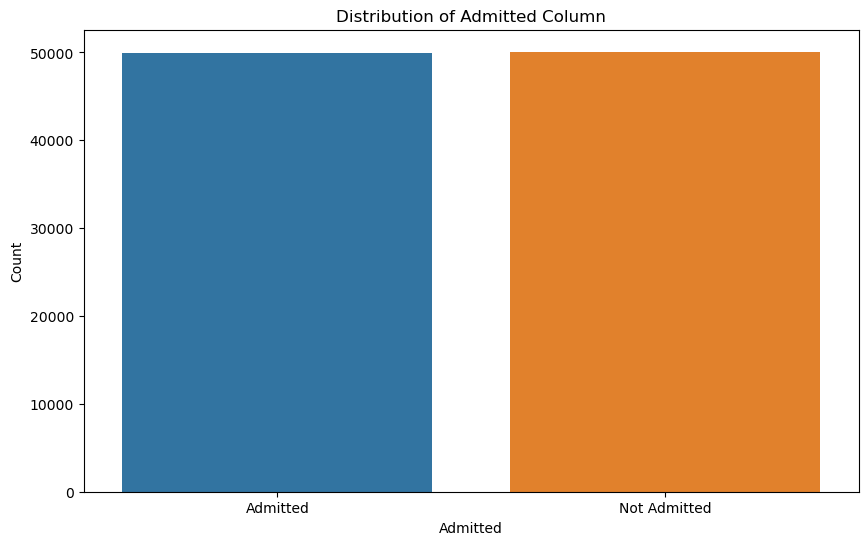

In [9]:
# to check if out target column is balanced
value_counts = df['Admitted_Flag'].value_counts()

# Plot the bar chart
custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e"])  # Blue and Orange

# Create the bar plot using the custom palette
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


# Customize the plot
plt.xlabel('Admitted')
plt.ylabel('Count')
plt.title('Distribution of Admitted Column')
plt.xticks(value_counts.index, ['Not Admitted', 'Admitted'])

# Show the plot
plt.show()

#### Caution
- Here, we observe that our target column is evenly distributed, but this might raise some doubts. In many real-world scenarios, we encounter imbalanced datasets, where one class significantly outweighs the others. One plausible explanation could be linked to the synthetic nature of our dataset, potentially contributing to this balanced distribution.

- Regarding the "ae_arrival_mode," despite our efforts to gather information from various sources and data dictionaries, we couldn't find the exact meanings behind the codes 0, 1, and 2. However, our best inference suggests that they could possibly correspond to ambulance arrival, self-arrival, or some other category. While we couldn't definitively determine their meanings, this insight provides a basis for further understanding.


In [10]:
# we had an earlier assumption that those with nan (icd10 code and func_code)
# were not admitted, the admitted flag here shows its not an accurate assumption.
# we decided to drop all these rows as they have quite a number of nan values across columns 

nan_rows = df[df['AE_Arrive_HourOfDay'].isna()]
nan_rows

,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,ICD10_Chapter_Code,Treatment_Function_Code,Length_Of_Stay_Days,Record_ID
94,NaN,85+,NaN,2017-10-07T00:00:00Z,NaN,80,Medium,1,1,5,0,NaN,15375,1,NaN,NaN,NaN,430132
546,2.0,85+,NaN,2016-05-15T00:00:00Z,NaN,240,Low,1,2,1,0,3.0,15368,1,NaN,NaN,NaN,671714
620,4.0,85+,NaN,2014-04-19T00:00:00Z,NaN,10,Low,1,1,4,0,0.0,15374,1,NaN,NaN,NaN,687237
628,7.0,85+,NaN,2016-07-23T00:00:00Z,NaN,920,Nothing,0,0,1,0,7.0,25911,1,NaN,NaN,NaN,273180
940,NaN,85+,NaN,2014-05-25T00:00:00Z,NaN,110,Low,1,1,1,0,NaN,15375,1,NaN,NaN,NaN,724580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99160,NaN,85+,NaN,2017-09-29T00:00:00Z,NaN,180,Low,1,1,2,0,NaN,27225,1,NaN,NaN,NaN,412284
99337,NaN,85+,NaN,2015-07-08T00:00:00Z,NaN,180,Low,1,1,2,0,NaN,15375,1,NaN,NaN,NaN,93970
99401,NaN,85+,NaN,2016-07-23T00:00:00Z,NaN,0,Low,1,1,0,0,NaN,25999,1,NaN,NaN,NaN,413378
99617,4.0,85+,NaN,2015-06-14T00:00:00Z,NaN,10,Low,1,1,5,0,2.0,15396,1,NaN,NaN,NaN,482634


In [11]:
# as they are 458 rows which is not that large compared to our data we decided to drop these rows
df = df.dropna(subset=['AE_Arrive_HourOfDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99542 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band                         99542 non-null  object 
 2   Sex                              99541 non-null  float64
 3   AE_Arrive_Date                   99542 non-null  object 
 4   AE_Arrive_HourOfDay              99542 non-null  object 
 5   AE_Time_Mins                     99542 non-null  int64  
 6   AE_HRG                           98039 non-null  object 
 7   AE_Num_Diagnoses                 99542 non-null  int64  
 8   AE_Num_Investigations            99542 non-null  int64  
 9   AE_Num_Treatments                99542 non-null  int64  
 10  AE_Arrival_Mode                  99542 non-null  int64  
 11  Provider_Patient_Distance_Miles  99542 non-null  float64
 12  ProvID            

In [12]:
# to get the freq table and statistics on how far patients had to travel to the ED,
# maximum distance shows 200miles
df['Provider_Patient_Distance_Miles'].describe()

count    99542.000000
mean         7.076058
std         16.728867
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max        200.000000
Name: Provider_Patient_Distance_Miles, dtype: float64

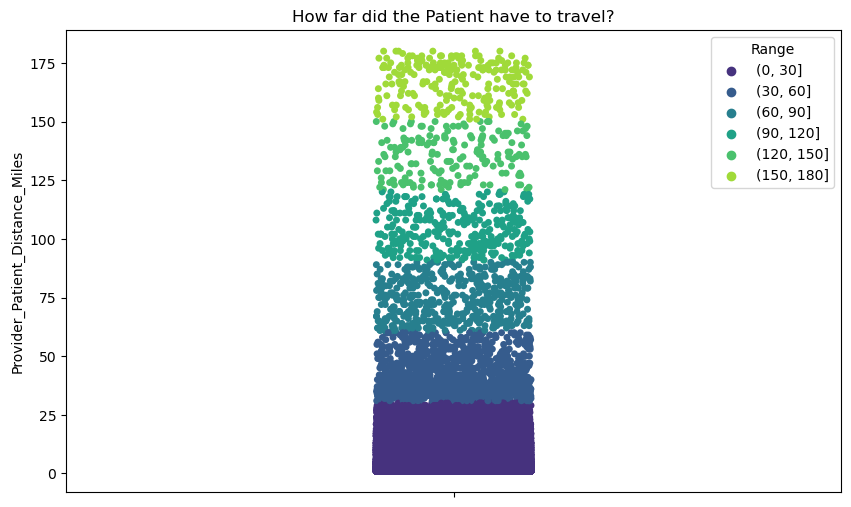

In [13]:
# plotted a graph to visualize the distance they had to go, as we can see 
# there is consistence in extreme distances which may indicate that extreme miles are not outliers
# we would leave values as such for now

df['Range'] = pd.cut(df['Provider_Patient_Distance_Miles'], bins=range(0, 200, 30))  # Creating a range column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.stripplot(data=df, y='Provider_Patient_Distance_Miles', hue='Range', palette='viridis', size=5)
# Set the labels and title
plt.ylabel('Provider_Patient_Distance_Miles')
plt.title('How far did the Patient have to travel?')

# Show the plot
plt.show()


In [14]:
df = df.drop(columns = 'Range') #dropping range col made for visualization

In [15]:
# exploring the length of days px was admitted for
df['Length_Of_Stay_Days'].value_counts()

0.0      12021
1.0      10897
2.0       5382
3.0       3674
4.0       2663
         ...  
138.0        1
158.0        1
162.0        1
74.0         1
147.0        1
Name: Length_Of_Stay_Days, Length: 140, dtype: int64

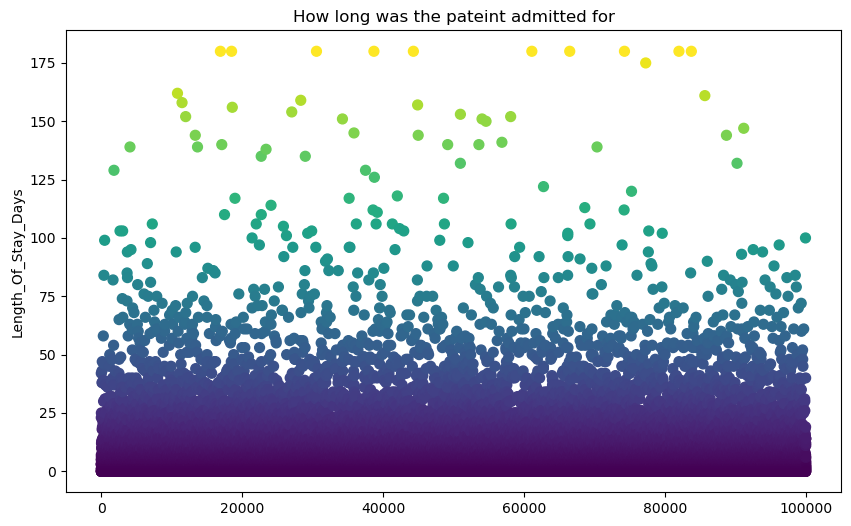

In [16]:

# how long the patient was admitted for already indicates ptx was admitted and perhaps potential data leakage 
# so we dropped this column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df.index, df['Length_Of_Stay_Days'], c=df['Length_Of_Stay_Days'], cmap='viridis', s=50)

plt.ylabel('Length_Of_Stay_Days')
plt.title('How long was the pateint admitted for')

# Show the plot
plt.show()

2.0    50826
1.0    48715
Name: Sex, dtype: int64


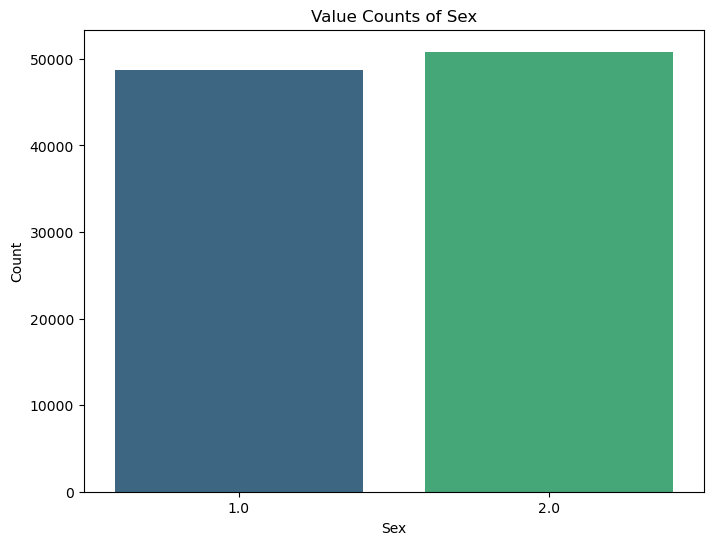

In [17]:
# looking at the spread for diferent sexes
print(df['Sex'].value_counts())
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.countplot(data=df, x='Sex', palette='viridis')

# Set the labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Value Counts of Sex')

# Show the plot
plt.show()

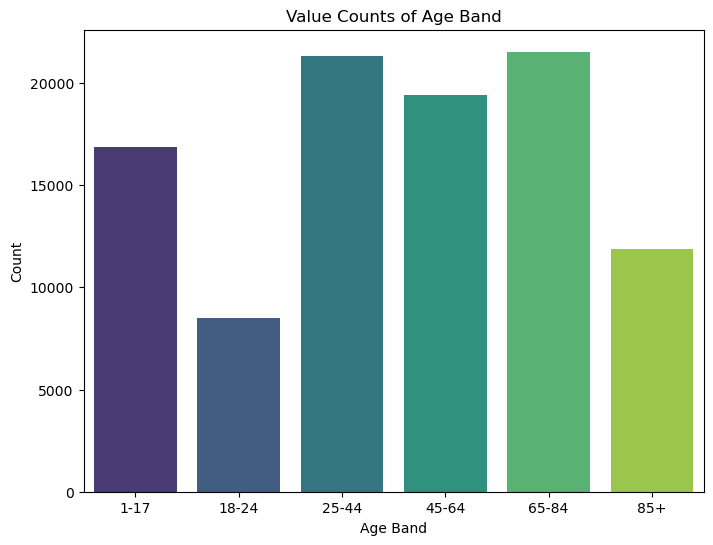

In [18]:
# visualizng the ageband to see if its evenely distributed 

# Sort the unique values in the Age_Band column
sorted_age_bands = df['Age_Band'].sort_values().unique()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.countplot(data=df, x='Age_Band', palette='viridis', order=sorted_age_bands)

# Set the labels and title
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.title('Value Counts of Age Band')

# Show the plot
plt.show()

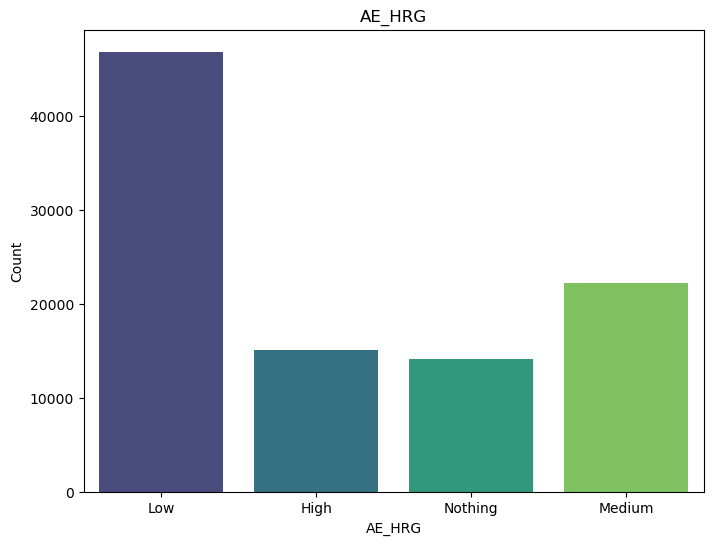

In [19]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.countplot(data=df, x='AE_HRG',  palette='viridis')

# Set the labels and title
plt.xlabel('AE_HRG')
plt.ylabel('Count')
plt.title('AE_HRG')

# Show the plot
plt.show()

In [20]:
df['ICD10_Chapter_Code'].value_counts()

Other    12027
XVIII     9705
XIX       7572
X         7389
IX        4447
XI        4324
XIV       3317
Name: ICD10_Chapter_Code, dtype: int64

In [21]:
df['Treatment_Function_Code'].value_counts()

300      19470
OTHER    14365
180       6540
420       4683
100       4560
Name: Treatment_Function_Code, dtype: int64

#### Findings and actions

- Our target variable, `Admitted_Flag`, is relatively balanced, showing a slightly higher count of admitted cases.
- We pruned rows with excessive missing data to clean up the dataset.
- When examining features like distance in miles, we aimed to identify outliers. Interestingly, even for considerable distances, records were spread across a wide range.
- To avoid data leakage, we removed the `Length_Of_Stay_Days` column.
- The `Sex` column displayed an even distribution, with code 2.0 having the highest occurrences.
- The `Age_Band` column exhibited diverse age groups.
- The `ICD10_Chapter_Code` and `Treatment_Function_Code` columns contained numerous 'OTHER' labels, which lack specific information.
- Notably, the maximum count for "hrg" is categorized as 'low'.
- It's worth noting that the value 'other' is present in both the ICD10 and TFC (Treatment Function Code) columns. This value holds the highest count for the ICD10 code column and the second-highest count for the TFC code column.

## Comparing our target column with some features

Treatment_Function_Code   100   180    300   420  OTHER
Admitted_Flag                                          
1                        4560  6540  19470  4683  14365


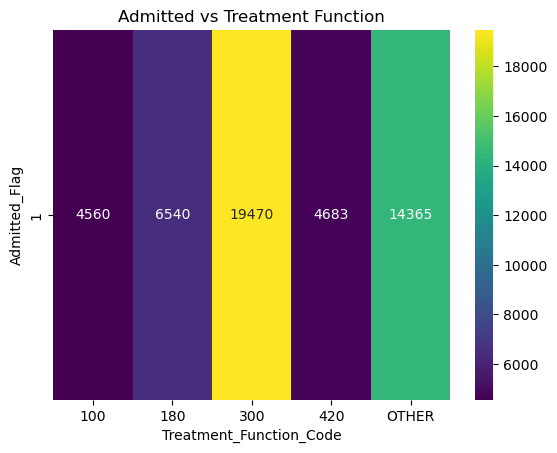

In [22]:
admitted_vs_treatment = pd.crosstab(df['Admitted_Flag'], df['Treatment_Function_Code'])
print(admitted_vs_treatment)
sns.heatmap(admitted_vs_treatment, annot=True, cmap='viridis', fmt='d')
plt.title('Admitted vs Treatment Function')
plt.show()

In [23]:
frequency_table = pd.crosstab(df['Admitted_Flag'], df['Treatment_Function_Code'])
print(frequency_table)

Treatment_Function_Code   100   180    300   420  OTHER
Admitted_Flag                                          
1                        4560  6540  19470  4683  14365


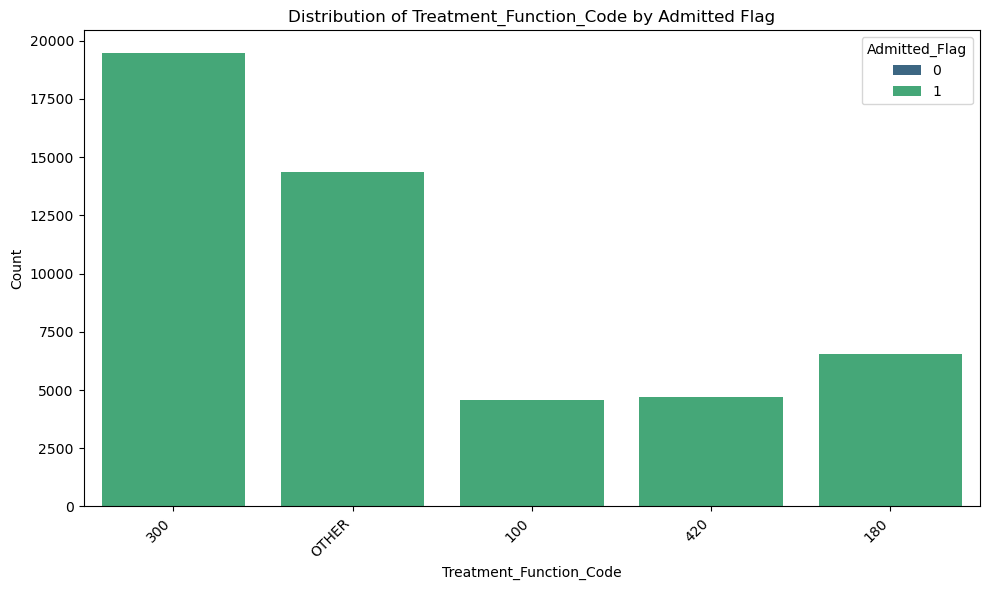

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Treatment_Function_Code', hue='Admitted_Flag', data=df, palette='viridis', dodge=False)
plt.title('Distribution of Treatment_Function_Code by Admitted Flag')
plt.xlabel('Treatment_Function_Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


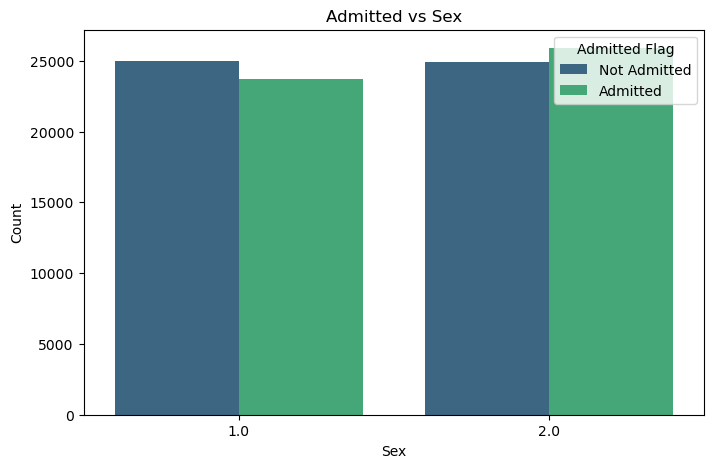

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Admitted_Flag', data=df, palette='viridis')
plt.title('Admitted vs Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Admitted Flag', labels=['Not Admitted', 'Admitted'])
plt.show()

/tmp/ipykernel_20/510114360.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


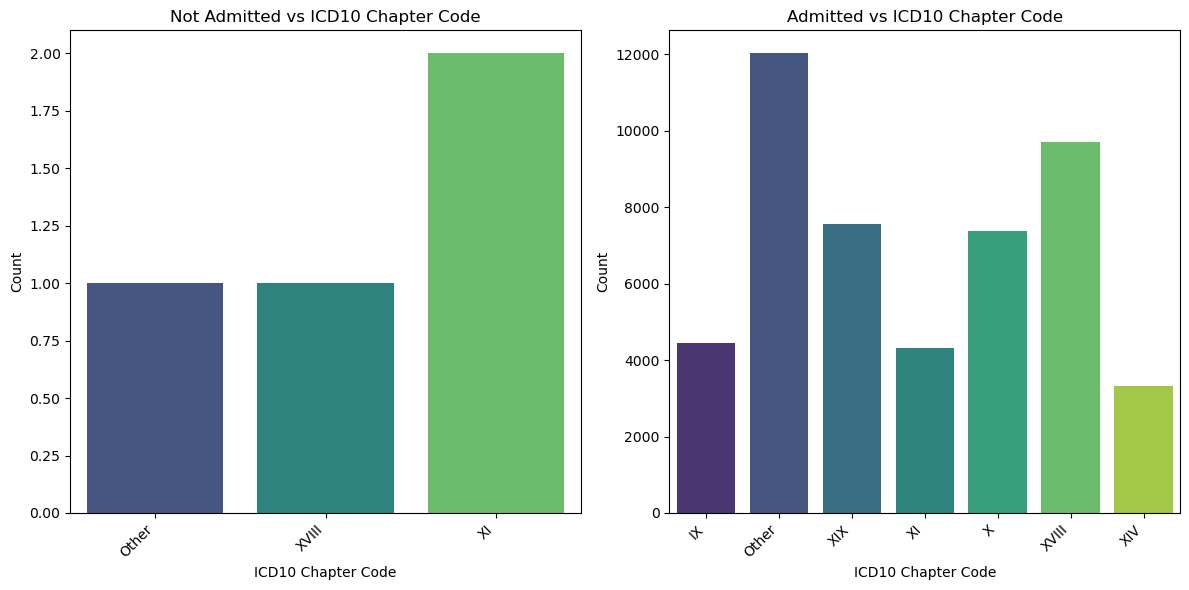

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='ICD10_Chapter_Code', data=df[df['Admitted_Flag'] == 0], palette='viridis')
plt.title('Not Admitted vs ICD10 Chapter Code')
plt.xlabel('ICD10 Chapter Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.countplot(x='ICD10_Chapter_Code', data=df[df['Admitted_Flag'] == 1], palette='viridis')
plt.title('Admitted vs ICD10 Chapter Code')
plt.xlabel('ICD10 Chapter Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [27]:
frequency_table = pd.crosstab(df['Admitted_Flag'], df['ICD10_Chapter_Code'])
print(frequency_table)


ICD10_Chapter_Code    IX  Other     X    XI   XIV   XIX  XVIII
Admitted_Flag                                                 
0                      0      1     0     2     0     0      1
1                   4447  12026  7389  4322  3317  7572   9704


### Patients not admitted but with ICD10 codes and the time they spent in the ED

In [28]:
# Filter for patients who were not admitted (target == 0) and have ICD codes
filtered_data = df[(df['Admitted_Flag'] == 0) & df['ICD10_Chapter_Code'].notnull()]

# Select the 'AE_Time_Mins' column for analysis
time_mins_not_admitted_icd = filtered_data['AE_Time_Mins']


print(time_mins_not_admitted_icd)

12393     40
23894    240
29809     20
99831    110
Name: AE_Time_Mins, dtype: int64


### Observation

Unlike the treatment function codes, where all patients with the code were admitted, there are only four instances in which patients have ICD-10 codes and were not admitted. The time spent by these patients in the emergency department (ED) varies and does not provide significant insight into the time period when a patient receives an ICD-10 code.

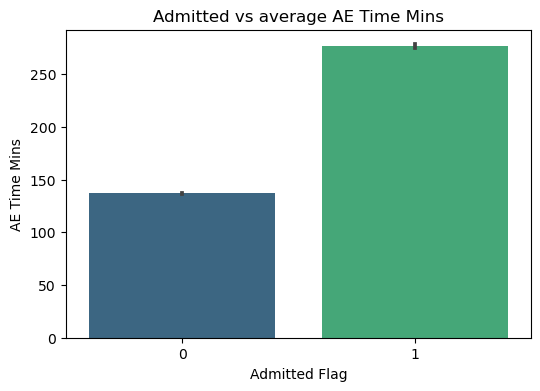

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Admitted_Flag', y='AE_Time_Mins', data=df, palette='viridis')
plt.title('Admitted vs average AE Time Mins')
plt.xlabel('Admitted Flag')
plt.ylabel('AE Time Mins')
plt.show()


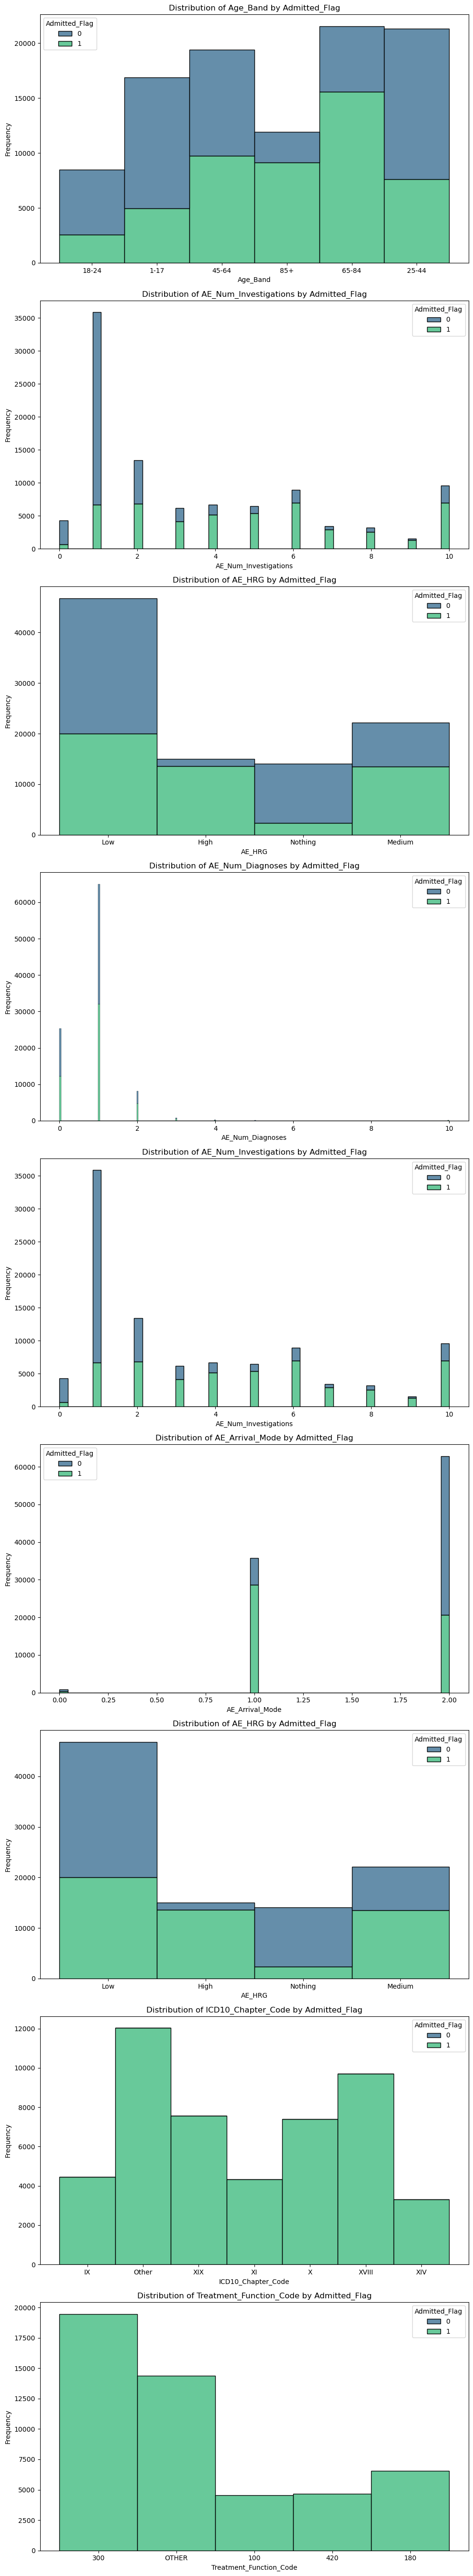

In [30]:

# List of features to compare
features_to_compare = ['Age_Band', 'AE_Num_Investigations', 'AE_HRG', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Arrival_Mode', 'AE_HRG', 'ICD10_Chapter_Code', 'Treatment_Function_Code']

# Set up subplots
num_rows = len(features_to_compare)
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6*num_rows))

# Plot histograms for each feature
for i, feature in enumerate(features_to_compare):
    sns.histplot(data=df, x=feature, hue='Admitted_Flag', multiple='stack', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature} by Admitted_Flag')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

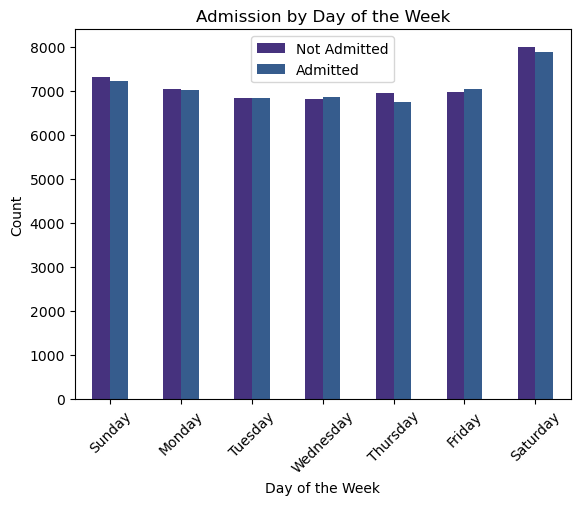

In [31]:
# Convert the 'date' column to datetime
df['AEArrive_Date'] = pd.to_datetime(df['AE_Arrive_Date'])

# Extract the day of the week
df['day_of_week'] = df['AEArrive_Date'].dt.day_name()

# Create a new DataFrame with the counts of admitted and not admitted for each day of the week
admitted_by_day = df.groupby(['day_of_week', 'Admitted_Flag'])['Admitted_Flag'].count().unstack().fillna(0)

# to reorder the days of the week
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
admitted_by_day = admitted_by_day.reindex(days_order)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.set_palette('viridis')
admitted_by_day.plot(kind='bar', stacked=False)
plt.title('Admission by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Not Admitted', 'Admitted'])
plt.show()

<Figure size 1000x600 with 0 Axes>

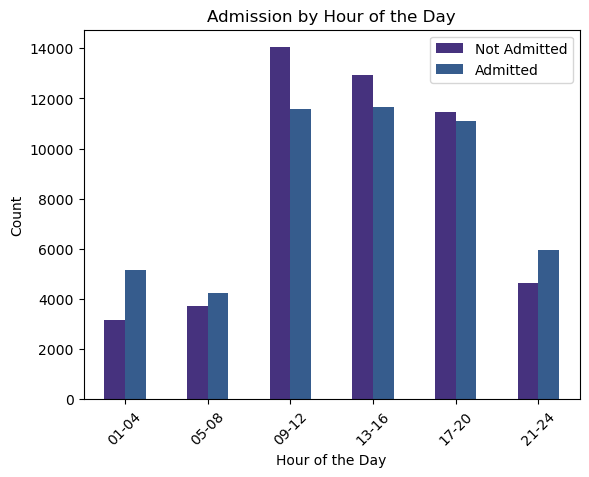

In [32]:
admitted_by_hour = df.groupby(['AE_Arrive_HourOfDay', 'Admitted_Flag'])['Admitted_Flag'].count().unstack().fillna(0)


plt.figure(figsize=(10, 6))
sns.set_palette('viridis')  
admitted_by_hour.plot(kind='bar', stacked=False)
plt.title('Admission by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Not Admitted', 'Admitted'])
plt.show()

In [33]:
# dropping new cols we added for exploration
df = df.drop(columns=['AEArrive_Date', 'day_of_week'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99542 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band                         99542 non-null  object 
 2   Sex                              99541 non-null  float64
 3   AE_Arrive_Date                   99542 non-null  object 
 4   AE_Arrive_HourOfDay              99542 non-null  object 
 5   AE_Time_Mins                     99542 non-null  int64  
 6   AE_HRG                           98039 non-null  object 
 7   AE_Num_Diagnoses                 99542 non-null  int64  
 8   AE_Num_Investigations            99542 non-null  int64  
 9   AE_Num_Treatments                99542 non-null  int64  
 10  AE_Arrival_Mode                  99542 non-null  int64  
 11  Provider_Patient_Distance_Miles  99542 non-null  float64
 12  ProvID            

#### Comment

After conducting detailed analyses using bar plots to visualize how different features relate to the target variable, we noticed varying distributions of data across both outcomes. 


- Our data dictionary highlights that the TFC code '300' signifies internal medicine and had the highest count among those who were admitted. It's important to note that various codes represent different departments beyond the ED. This lines up with our assumption that this code might be assigned after the patient's outcome has been determined.

- Strikingly, there were only four instances where ICD10 codes were linked to non-admitted cases. These cases exhibited varying durations in the emergency department. It raises questions about the possible scenarios for patients who received ICD codes without being admitted. The inconsistency becomes puzzling, particularly when considering patients who spent a mere 20 minutes in the ED without being admitted but still received an ICD code.

- On average, patients who were admitted spent roughly 250 minutes in the ED, while those who weren't admitted spent about 150 minutes.

- The '65-84' age band witnessed the highest number of admissions, while the '25-44' and '1-17' age bands saw the fewest.

- Among the Health Resource Group (HRG) categories, the 'low' category experienced the most admissions.

- Analyzing the days of the week, Saturday emerged with the highest number of admissions. Notably, the '9-12' time range marked the peak in admissions throughout the week.

- These diverse observations are key components for interpreting our data effectively and guiding future decision-making. They hold the potential to shape insightful inferences and strategies moving forward.

In [34]:
df['AE_HRG'].unique()

array(['Low', 'High', 'Nothing', nan, 'Medium'], dtype=object)

## 3.2. Data Cleaning  <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


#### Actions

During the data cleaning process, we took the following steps:
- In the `ICD10_Chapter_Code` and `Treatment_Function_Code` columns, we replaced missing values with a new label, 'unknown', ensuring our data remained intact.
- To enhance the usability of the `AE_Arrive_Date` feature, we converted its date format into a machine-learning-friendly integer format.
- Similarly, for the `AE_Arrive_HourOfDay` column, we transformed the time format into an integer representation.
- In the `Sex` column, as the count of missing values was minimal, we opted to replace them with the mode value, maintaining data integrity.

These data cleaning measures contribute to a more coherent and reliable dataset for our analysis.

In [35]:
# Data cleaning

def clean_df(df):
    # Fill missing values in categorical columns
    df['AE_HRG'] = df['AE_HRG'].fillna('Unknown')
    df['Sex'] = df['Sex'].fillna(2.0)
    df['ICD10_Chapter_Code'] = df['ICD10_Chapter_Code'].fillna('Unknown')
    df['Treatment_Function_Code'] = df['Treatment_Function_Code'].fillna('Unknown')
    
    # Convert date and time columns
    df['AE_Arrive_Date'] = pd.to_datetime(df['AE_Arrive_Date'])
    df['AE_Arrive_HourOfDay'] = pd.to_datetime(df['AE_Arrive_HourOfDay'], format='%H-%M').dt.time
    df['Hour'] = pd.to_datetime(df['AE_Arrive_HourOfDay'], format='%H:%M:%S').dt.hour
    df['Minute'] = pd.to_datetime(df['AE_Arrive_HourOfDay'], format='%H:%M:%S').dt.minute
    
    
    # Drop columns
    df = df.drop(columns=['AE_Arrive_Date', 'AE_Arrive_HourOfDay', 'Length_Of_Stay_Days'])
    
    return df

In [36]:
df = clean_df(df)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99542 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band                         99542 non-null  object 
 2   Sex                              99542 non-null  float64
 3   AE_Time_Mins                     99542 non-null  int64  
 4   AE_HRG                           99542 non-null  object 
 5   AE_Num_Diagnoses                 99542 non-null  int64  
 6   AE_Num_Investigations            99542 non-null  int64  
 7   AE_Num_Treatments                99542 non-null  int64  
 8   AE_Arrival_Mode                  99542 non-null  int64  
 9   Provider_Patient_Distance_Miles  99542 non-null  float64
 10  ProvID                           99542 non-null  int64  
 11  Admitted_Flag                    99542 non-null  int64  
 12  ICD10_Chapter_Code

In [38]:
df

,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,ICD10_Chapter_Code,Treatment_Function_Code,Record_ID,Hour,Minute
0,7.0,18-24,2.0,650,Low,2,2,1,1,8.0,15149,0,Unknown,Unknown,765388,1,4
1,7.0,1-17,2.0,200,Low,1,1,1,2,1.0,15099,0,Unknown,Unknown,774977,21,24
2,2.0,45-64,2.0,40,Low,1,1,4,2,1.0,15194,0,Unknown,Unknown,769250,13,16
3,1.0,85+,2.0,110,Low,1,1,2,1,1.0,15260,1,IX,300,795829,17,20
4,3.0,18-24,1.0,60,Low,1,2,2,2,2.0,15105,0,Unknown,Unknown,732712,13,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,45-64,1.0,230,High,1,4,4,1,7.0,15177,1,XI,300,922616,1,4
99996,5.0,65-84,2.0,240,Low,1,1,2,1,6.0,15175,0,Unknown,Unknown,938129,13,16
99997,5.0,85+,2.0,180,High,1,5,3,2,3.0,15214,1,XVIII,420,555385,9,12
99998,10.0,65-84,2.0,40,Nothing,1,1,1,2,155.0,15232,0,Unknown,Unknown,204676,13,16


#### Considerations

Some columns, including 'AE_Time_Mins' and other time-related columns, raised concerns about potential data leakage. This was because, if these columns were collected after the patient's outcome was determined, they could inadvertently influence the model's predictions. However, upon closer examination of the data dictionary, we discovered that 'AE_Time_Mins' actually represented the time from arrival to the commencement of treatment. This distinction is important, as it does not overlap with the outcome determination process.

Although certain columns, such as 'AE_Arrival_Mode', might appear to have the potential for data leakage due to their potential influence on patient outcomes, we decided to retain them in the dataset. Our rationale is that these features could provide valuable insights to the model about the patient's condition and the circumstances of their arrival at the emergency department. By exercising careful judgment and considering the specific meanings behind these columns, we believe they can contribute positively to the model's predictive performance without introducing data leakage concerns.

 In certain instances further along we excluded these columns('AE_Time_Mins', 'ICD10_Chapter_Code', Treatment_Function_Code','AE_Num_Diagnoses', 'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Time_Mins' ) from the dataset and trained the model apart from them. This helped us understand the significance of these columns in influencing the model's predictions.

In [39]:
df.to_csv('clean_data.csv', index=False)

In [40]:
df = pd.read_csv('/kaggle/working/clean_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99542 entries, 0 to 99541
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Age_Band                         99542 non-null  object 
 2   Sex                              99542 non-null  float64
 3   AE_Time_Mins                     99542 non-null  int64  
 4   AE_HRG                           99542 non-null  object 
 5   AE_Num_Diagnoses                 99542 non-null  int64  
 6   AE_Num_Investigations            99542 non-null  int64  
 7   AE_Num_Treatments                99542 non-null  int64  
 8   AE_Arrival_Mode                  99542 non-null  int64  
 9   Provider_Patient_Distance_Miles  99542 non-null  float64
 10  ProvID                           99542 non-null  int64  
 11  Admitted_Flag                    99542 non-null  int64  
 12  ICD10_Chapter_Code

In [41]:
df.head(20)
df['Treatment_Function_Code'].unique()

array(['Unknown', '300', 'OTHER', '100', '420', '180'], dtype=object)

In [42]:
# checking for any null values
df.isnull().sum()

IMD_Decile_From_LSOA               0
Age_Band                           0
Sex                                0
AE_Time_Mins                       0
AE_HRG                             0
AE_Num_Diagnoses                   0
AE_Num_Investigations              0
AE_Num_Treatments                  0
AE_Arrival_Mode                    0
Provider_Patient_Distance_Miles    0
ProvID                             0
Admitted_Flag                      0
ICD10_Chapter_Code                 0
Treatment_Function_Code            0
Record_ID                          0
Hour                               0
Minute                             0
dtype: int64

In [43]:
# looking at our categorical values
category_columns =[col for col in df.columns if df[col].dtype == 'object']
category_columns

['Age_Band', 'AE_HRG', 'ICD10_Chapter_Code', 'Treatment_Function_Code']

In [44]:
# frequency distribution of categorical varaibles & percentage of frequency distribution
for var in category_columns: 
    
    print(df[var].value_counts(),'\n', df[var].value_counts()/float(len(df)), '\n')

65-84    21532
25-44    21299
45-64    19420
1-17     16889
85+      11902
18-24     8500
Name: Age_Band, dtype: int64 
 65-84    0.216311
25-44    0.213970
45-64    0.195094
1-17     0.169667
85+      0.119568
18-24    0.085391
Name: Age_Band, dtype: float64 

Low        46781
Medium     22159
High       15031
Nothing    14068
Unknown     1503
Name: AE_HRG, dtype: int64 
 Low        0.469962
Medium     0.222610
High       0.151002
Nothing    0.141327
Unknown    0.015099
Name: AE_HRG, dtype: float64 

Unknown    50761
Other      12027
XVIII       9705
XIX         7572
X           7389
IX          4447
XI          4324
XIV         3317
Name: ICD10_Chapter_Code, dtype: int64 
 Unknown    0.509946
Other      0.120823
XVIII      0.097497
XIX        0.076068
X          0.074230
IX         0.044675
XI         0.043439
XIV        0.033323
Name: ICD10_Chapter_Code, dtype: float64 

Unknown    49924
300        19470
OTHER      14365
180         6540
420         4683
100         4560
Name: Treat

In [45]:
# preview of categorical columns
df[category_columns].head()

,Age_Band,AE_HRG,ICD10_Chapter_Code,Treatment_Function_Code
0,18-24,Low,Unknown,Unknown
1,1-17,Low,Unknown,Unknown
2,45-64,Low,Unknown,Unknown
3,85+,Low,IX,300
4,18-24,Low,Unknown,Unknown


## 3.3. Encoding Categorical variables  <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


#### Encoding variables

We opted for one-hot encoding for all categorical variables, considering there was no inherent ranking among them. Additionally, the number of distinct values within each categorical feature was within a reasonable range (less than 20), which helped prevent the table from becoming excessively wide.

In [46]:
# one-hot encoding using pd.get_dummies
encoded_data = pd.get_dummies(df, columns=['Age_Band', 'AE_HRG', 'ICD10_Chapter_Code', 'Treatment_Function_Code'])

# Print the encoded data
encoded_data




,IMD_Decile_From_LSOA,Sex,AE_Time_Mins,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,...,ICD10_Chapter_Code_XI,ICD10_Chapter_Code_XIV,ICD10_Chapter_Code_XIX,ICD10_Chapter_Code_XVIII,Treatment_Function_Code_100,Treatment_Function_Code_180,Treatment_Function_Code_300,Treatment_Function_Code_420,Treatment_Function_Code_OTHER,Treatment_Function_Code_Unknown
0,7.0,2.0,650,2,2,1,1,8.0,15149,0,...,0,0,0,0,0,0,0,0,0,1
1,7.0,2.0,200,1,1,1,2,1.0,15099,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,2.0,40,1,1,4,2,1.0,15194,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,2.0,110,1,1,2,1,1.0,15260,1,...,0,0,0,0,0,0,1,0,0,0
4,3.0,1.0,60,1,2,2,2,2.0,15105,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99537,10.0,1.0,230,1,4,4,1,7.0,15177,1,...,1,0,0,0,0,0,1,0,0,0
99538,5.0,2.0,240,1,1,2,1,6.0,15175,0,...,0,0,0,0,0,0,0,0,0,1
99539,5.0,2.0,180,1,5,3,2,3.0,15214,1,...,0,0,0,1,0,0,0,1,0,0
99540,10.0,2.0,40,1,1,1,2,155.0,15232,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df = encoded_data

In [48]:
df.head(10)

,IMD_Decile_From_LSOA,Sex,AE_Time_Mins,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Admitted_Flag,...,ICD10_Chapter_Code_XI,ICD10_Chapter_Code_XIV,ICD10_Chapter_Code_XIX,ICD10_Chapter_Code_XVIII,Treatment_Function_Code_100,Treatment_Function_Code_180,Treatment_Function_Code_300,Treatment_Function_Code_420,Treatment_Function_Code_OTHER,Treatment_Function_Code_Unknown
0,7.0,2.0,650,2,2,1,1,8.0,15149,0,...,0,0,0,0,0,0,0,0,0,1
1,7.0,2.0,200,1,1,1,2,1.0,15099,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,2.0,40,1,1,4,2,1.0,15194,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,2.0,110,1,1,2,1,1.0,15260,1,...,0,0,0,0,0,0,1,0,0,0
4,3.0,1.0,60,1,2,2,2,2.0,15105,0,...,0,0,0,0,0,0,0,0,0,1
5,4.0,1.0,180,1,7,2,1,8.0,15231,1,...,0,0,0,0,0,0,1,0,0,0
6,8.0,1.0,460,1,10,10,1,16.0,15310,1,...,0,0,1,0,0,0,0,0,1,0
7,6.0,2.0,130,1,1,2,1,24.0,15285,1,...,0,0,0,0,0,0,1,0,0,0
8,4.0,1.0,840,1,8,3,2,0.0,15273,1,...,1,0,0,0,1,0,0,0,0,0
9,5.0,2.0,150,2,2,3,2,6.0,15353,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99542 entries, 0 to 99541
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Sex                              99542 non-null  float64
 2   AE_Time_Mins                     99542 non-null  int64  
 3   AE_Num_Diagnoses                 99542 non-null  int64  
 4   AE_Num_Investigations            99542 non-null  int64  
 5   AE_Num_Treatments                99542 non-null  int64  
 6   AE_Arrival_Mode                  99542 non-null  int64  
 7   Provider_Patient_Distance_Miles  99542 non-null  float64
 8   ProvID                           99542 non-null  int64  
 9   Admitted_Flag                    99542 non-null  int64  
 10  Record_ID                        99542 non-null  int64  
 11  Hour                             99542 non-null  int64  
 12  Minute            

In [50]:
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99542 entries, 0 to 99541
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IMD_Decile_From_LSOA             99542 non-null  float64
 1   Sex                              99542 non-null  float64
 2   AE_Time_Mins                     99542 non-null  int64  
 3   AE_Num_Diagnoses                 99542 non-null  int64  
 4   AE_Num_Investigations            99542 non-null  int64  
 5   AE_Num_Treatments                99542 non-null  int64  
 6   AE_Arrival_Mode                  99542 non-null  int64  
 7   Provider_Patient_Distance_Miles  99542 non-null  float64
 8   ProvID                           99542 non-null  int64  
 9   Record_ID                        99542 non-null  int64  
 10  Hour                             99542 non-null  int64  
 11  Minute                           99542 non-null  int64  
 12  Age_Band_1-17     

# **4. Feature selection (Filter Methods)** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



## 4.1. Removing constant features  <a class="anchor" id="4"></a>
​
[Back to Table of Contents](#0.1)
​


#### Important

we would begin with splitting the data into training and testing data:
In all feature selection procedures, it is good practice to select the features by examining only the training set. This is done to avoid overfitting.


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [53]:
# check shape of training and test sets

X_train.shape, X_test.shape

((79633, 37), (19909, 37))

In [54]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [55]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

37

After applying the variance threshold method for feature selection, our analysis indicates that there are no constant features present in the dataset. With this confirmation, we can move forward with other feature selection methods to refine our model's input variables.

## 4.2. Using K-best(SelectKBest)  <a class="anchor" id="4"></a>
​
[Back to Table of Contents](#0.1)
​


In [56]:

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=20)

# Fit the selector on the training data and transform the features
X_selected = selector.fit_transform(X_train, y_train)


# Get the indices of the top-k features
top_k_indices = selector.get_support(indices=True)
selected_feature_names = [X_train.columns[i] for i in top_k_indices]
# to add the field we would to evaluate our work.
# selected_feature_names.append('Record_ID')
selected_feature_names

['AE_Time_Mins',
 'AE_Num_Investigations',
 'AE_Num_Treatments',
 'AE_Arrival_Mode',
 'Age_Band_65-84',
 'AE_HRG_High',
 'AE_HRG_Nothing',
 'ICD10_Chapter_Code_IX',
 'ICD10_Chapter_Code_Other',
 'ICD10_Chapter_Code_Unknown',
 'ICD10_Chapter_Code_X',
 'ICD10_Chapter_Code_XI',
 'ICD10_Chapter_Code_XIX',
 'ICD10_Chapter_Code_XVIII',
 'Treatment_Function_Code_100',
 'Treatment_Function_Code_180',
 'Treatment_Function_Code_300',
 'Treatment_Function_Code_420',
 'Treatment_Function_Code_OTHER',
 'Treatment_Function_Code_Unknown']

## 4.3. Correlation-Matrix with Heatmap  <a class="anchor" id="4"></a>
​
[Back to Table of Contents](#0.1)
​



In [57]:
# Convert feature matrix into DataFrame
df_x = pd.DataFrame(X)

# View the data frame
df_x

,IMD_Decile_From_LSOA,Sex,AE_Time_Mins,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Record_ID,...,ICD10_Chapter_Code_XI,ICD10_Chapter_Code_XIV,ICD10_Chapter_Code_XIX,ICD10_Chapter_Code_XVIII,Treatment_Function_Code_100,Treatment_Function_Code_180,Treatment_Function_Code_300,Treatment_Function_Code_420,Treatment_Function_Code_OTHER,Treatment_Function_Code_Unknown
0,7.0,2.0,650,2,2,1,1,8.0,15149,765388,...,0,0,0,0,0,0,0,0,0,1
1,7.0,2.0,200,1,1,1,2,1.0,15099,774977,...,0,0,0,0,0,0,0,0,0,1
2,2.0,2.0,40,1,1,4,2,1.0,15194,769250,...,0,0,0,0,0,0,0,0,0,1
3,1.0,2.0,110,1,1,2,1,1.0,15260,795829,...,0,0,0,0,0,0,1,0,0,0
4,3.0,1.0,60,1,2,2,2,2.0,15105,732712,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99537,10.0,1.0,230,1,4,4,1,7.0,15177,922616,...,1,0,0,0,0,0,1,0,0,0
99538,5.0,2.0,240,1,1,2,1,6.0,15175,938129,...,0,0,0,0,0,0,0,0,0,1
99539,5.0,2.0,180,1,5,3,2,3.0,15214,555385,...,0,0,0,1,0,0,0,1,0,0
99540,10.0,2.0,40,1,1,1,2,155.0,15232,204676,...,0,0,0,0,0,0,0,0,0,1


In [58]:
# Create correlation matrix
corr_matrix = df_x.corr()
corr_matrix

,IMD_Decile_From_LSOA,Sex,AE_Time_Mins,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Record_ID,...,ICD10_Chapter_Code_XI,ICD10_Chapter_Code_XIV,ICD10_Chapter_Code_XIX,ICD10_Chapter_Code_XVIII,Treatment_Function_Code_100,Treatment_Function_Code_180,Treatment_Function_Code_300,Treatment_Function_Code_420,Treatment_Function_Code_OTHER,Treatment_Function_Code_Unknown
IMD_Decile_From_LSOA,1.000000,-0.001010,0.001575,0.012655,0.000934,0.031105,-0.006431,0.093321,-0.008003,0.000757,...,0.009878,0.001590,0.005756,0.001924,0.004943,0.000718,0.004347,-0.002354,0.011190,-0.012739
Sex,-0.001010,1.000000,0.023186,-0.000999,0.025640,0.004519,-0.011253,-0.000671,-0.005980,0.000604,...,0.001689,0.010336,0.010664,0.013925,0.005731,0.009135,0.001695,0.003400,0.018421,-0.022654
AE_Time_Mins,0.001575,0.023186,1.000000,0.010612,0.336517,0.142602,-0.324184,-0.019038,-0.106838,-0.001019,...,0.079985,0.084308,0.115871,0.136545,0.073214,0.120098,0.219175,0.064837,0.175307,-0.414666
AE_Num_Diagnoses,0.012655,-0.000999,0.010612,1.000000,0.122635,0.146159,-0.054265,0.004869,-0.030715,0.003030,...,0.013368,0.009368,0.016818,0.009137,0.001417,-0.016809,0.033020,0.017465,0.039990,-0.053960
AE_Num_Investigations,0.000934,0.025640,0.336517,0.122635,1.000000,0.463125,-0.264228,-0.019671,-0.121689,-0.004344,...,0.094530,0.084479,0.129183,0.153316,0.095482,0.144259,0.210079,0.099933,0.182086,-0.448360
AE_Num_Treatments,0.031105,0.004519,0.142602,0.146159,0.463125,1.000000,-0.131181,-0.006507,-0.095910,-0.001499,...,0.057141,0.049408,0.077664,0.087094,0.061373,0.085351,0.127997,0.050630,0.091438,-0.255203
AE_Arrival_Mode,-0.006431,-0.011253,-0.324184,-0.054265,-0.264228,-0.131181,1.000000,0.009982,0.106779,0.005456,...,-0.067262,-0.080745,-0.110834,-0.137255,-0.018443,-0.107503,-0.318829,0.027233,-0.170588,0.422275
Provider_Patient_Distance_Miles,0.093321,-0.000671,-0.019038,0.004869,-0.019671,-0.006507,0.009982,1.000000,0.026194,-0.001149,...,-0.001932,-0.010156,0.000677,-0.016198,-0.004770,-0.013904,-0.010107,-0.009505,-0.003875,0.023651
ProvID,-0.008003,-0.005980,-0.106838,-0.030715,-0.121689,-0.095910,0.106779,0.026194,1.000000,0.002591,...,-0.026282,-0.024004,-0.040400,-0.041872,-0.019226,-0.041847,-0.066188,-0.015243,-0.052455,0.124604
Record_ID,0.000757,0.000604,-0.001019,0.003030,-0.004344,-0.001499,0.005456,-0.001149,0.002591,1.000000,...,0.000255,-0.003115,0.004335,-0.007895,-0.001464,-0.006302,-0.004044,0.001245,0.003572,0.003906


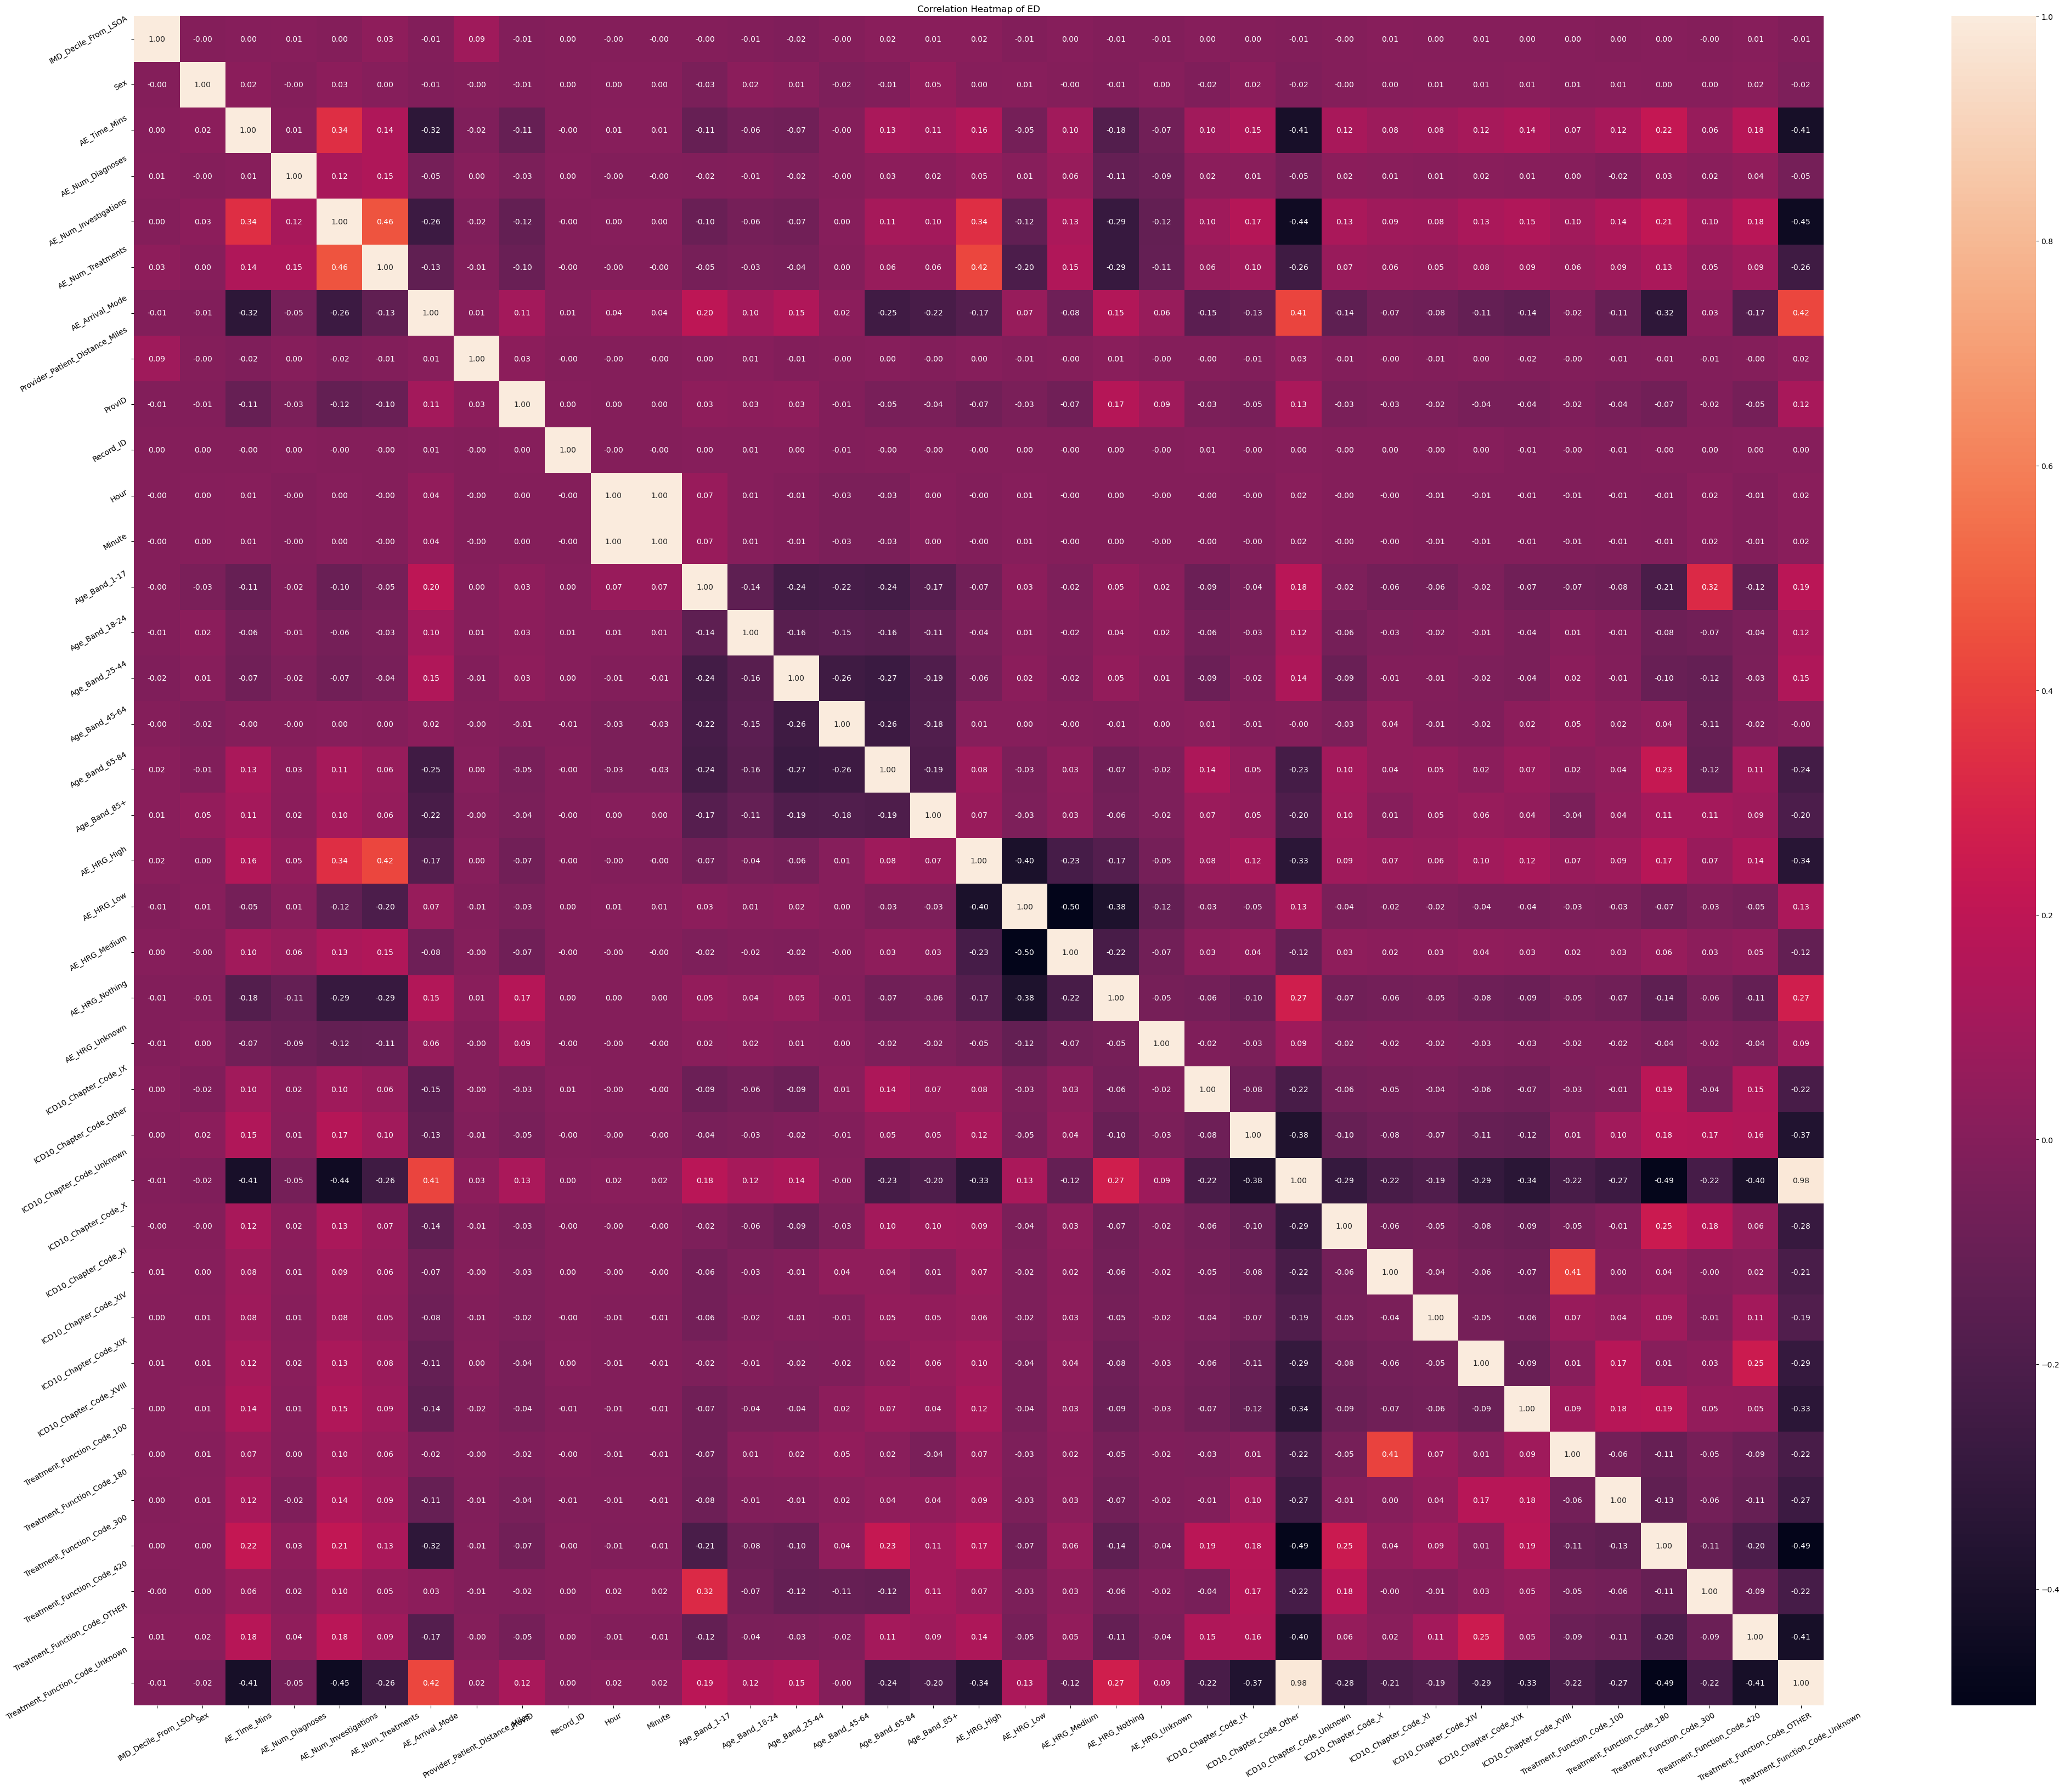

In [59]:
# Create correlation heatmap
plt.figure(figsize=(60, 40))
plt.title('Correlation Heatmap of ED')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

In [60]:

# Assuming you have your dataset loaded in a DataFrame 'df'
correlation_matrix = df_x.corr()

# Set a threshold for high correlation
high_corr_threshold = 0.9

# Find highly correlated features
high_corr_pairs = np.where(np.abs(correlation_matrix) > high_corr_threshold)
high_corr_features = [(correlation_matrix.index[i], correlation_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j]

# Print the highly correlated features
for feat1, feat2 in high_corr_features:
    print(f"Highly correlated features: {feat1} and {feat2}, Correlation: {correlation_matrix.loc[feat1, feat2]}")


Highly correlated features: Hour and Minute, Correlation: 1.0
Highly correlated features: Minute and Hour, Correlation: 1.0
Highly correlated features: ICD10_Chapter_Code_Unknown and Treatment_Function_Code_Unknown, Correlation: 0.983160255375966
Highly correlated features: Treatment_Function_Code_Unknown and ICD10_Chapter_Code_Unknown, Correlation: 0.983160255375966


#### Considerations
Due to strong correlation, we'll drop Minute and Treatment_Function_Code_UnKnown features for optimization.

In [61]:
df_x = df_x.drop(columns = ['Minute', 'Treatment_Function_Code_Unknown'])

In [62]:
# correlation heatmap features
df_x.columns

Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44', 'Age_Band_45-64',
       'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High', 'AE_HRG_Low',
       'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown',
       'ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER'],
      dtype='object')

#### Comments
For the initial feature selection, we opted for filter methods. They assess feature correlation with outcomes without relying on specific machine learning algorithms. Filter methods are computationally efficient and suitable for quickly identifying irrelevant features. We'll proceed with the selected features and also explore embedded methods, which iteratively extract impactful features during model training, enhancing training effectiveness. We didnt use any wrapper methods for feature selection as they could be computationally expensive.

# **5. Model Training** <a class="anchor" id="5"></a>



#### Actions
For most of our models asides the ensemble ones, we would use a combination of the features selected by K-best and the correlation matrix.

For claity we would print out the features used for each model together with the performance results.
 
 


## 5.1. Logistic Regression with Ridge Regularization  <a class="anchor" id="5"></a>
​
[Back to Table of Contents](#0.1)

In [63]:
selected_feature_names.remove('Treatment_Function_Code_Unknown')
selected_feature_names
# these are selected features based on the result from the k-best and correlation matrix selection


['AE_Time_Mins',
 'AE_Num_Investigations',
 'AE_Num_Treatments',
 'AE_Arrival_Mode',
 'Age_Band_65-84',
 'AE_HRG_High',
 'AE_HRG_Nothing',
 'ICD10_Chapter_Code_IX',
 'ICD10_Chapter_Code_Other',
 'ICD10_Chapter_Code_Unknown',
 'ICD10_Chapter_Code_X',
 'ICD10_Chapter_Code_XI',
 'ICD10_Chapter_Code_XIX',
 'ICD10_Chapter_Code_XVIII',
 'Treatment_Function_Code_100',
 'Treatment_Function_Code_180',
 'Treatment_Function_Code_300',
 'Treatment_Function_Code_420',
 'Treatment_Function_Code_OTHER']

We plan to initially train our model using all the available features before conducting any feature selection. This serves as a baseline to gauge the model's performance and provides a point of reference to assess the subsequent impact of feature selection techniques.

In [64]:

X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Create and train the Logistic Regression model with Ridge regularization
model_l = LogisticRegression()
model_l.fit(X_train, y_train)

# Predict the target values
y_pred = model_l.predict(X_test)

# Evaluate the model
accuracy1 = model_l.score(X_test, y_test)

# Calculate F1 score, precision, and recall
f11 = f1_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f11)
print("Precision:", precision1)
print("Recall:", recall1)
print("Accuracy:", accuracy1)

F1 Score: 0.7399939510031254
Precision: 0.741863755811603
Recall: 0.7381335478680612
Accuracy: 0.7409211914209654


#### Using StandardScaler
We scale the variables here because scaling variables holds significant importance within various machine learning algorithms, as it can notably enhance model performance and promote smoother convergence during the training process. 

In [65]:
# Logistic reg using the selected features
X_select = X[selected_feature_names]
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=10)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model with Ridge regularization
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=10)
model_l2.fit(X_train_scaled, y_train)

# Predict the target values
y_pred = model_l2.predict(X_test_scaled) 

# Evaluate the model
accuracy2 = model_l2.score(X_test_scaled, y_test)

# Calculate F1 score, precision, and recall
f12 = f1_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f12)
print("Precision:", precision2)
print("Recall:", recall2)
print("Accuracy:", accuracy2)


F1 Score: 0.9998491325119436
Precision: 1.0
Recall: 0.9996983105390185
Accuracy: 0.999849314380431


In [66]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9965
           1       1.00      1.00      1.00      9944

    accuracy                           1.00     19909
   macro avg       1.00      1.00      1.00     19909
weighted avg       1.00      1.00      1.00     19909



## 5.2. Decision Trees  <a class="anchor" id="5"></a>
​
[Back to Table of Contents](#0.1)

In [67]:
# Decision tree using all our features
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)
pred1 = clf_dt.predict(X_test)

# Calculate evaluation metrics
accuracy3 = accuracy_score(y_test, pred1)
f13 = f1_score(y_test, pred1, average='weighted')
precision3 = precision_score(y_test, pred1, average='weighted')
recall3 = recall_score(y_test, pred1, average='weighted')

print(f"Accuracy: {accuracy3:.4f}")
print(f"F1 Score: {f13:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(X.columns)

Accuracy: 0.9995
F1 Score: 0.9995
Precision: 0.9995
Recall: 0.9995
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown',
       'ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown'],
      dtype='object')


## 5.3. Random Forest using GridCV  <a class="anchor" id="5"></a>

Since Random Forests inherently possess embedded methods for feature selection, we will incorporate all the features into our model initially. Subsequently, we will leverage the built-in methods within Random Forests to identify the most relevant features for our analysis.
​

[Back to Table of Contents](#0.1)

In [68]:

X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define hyperparameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC score: {auc_score:.4f}")
print(X.columns)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9998
AUC score: 0.9998
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown',
       'ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatm

#### Embedded Feature selection

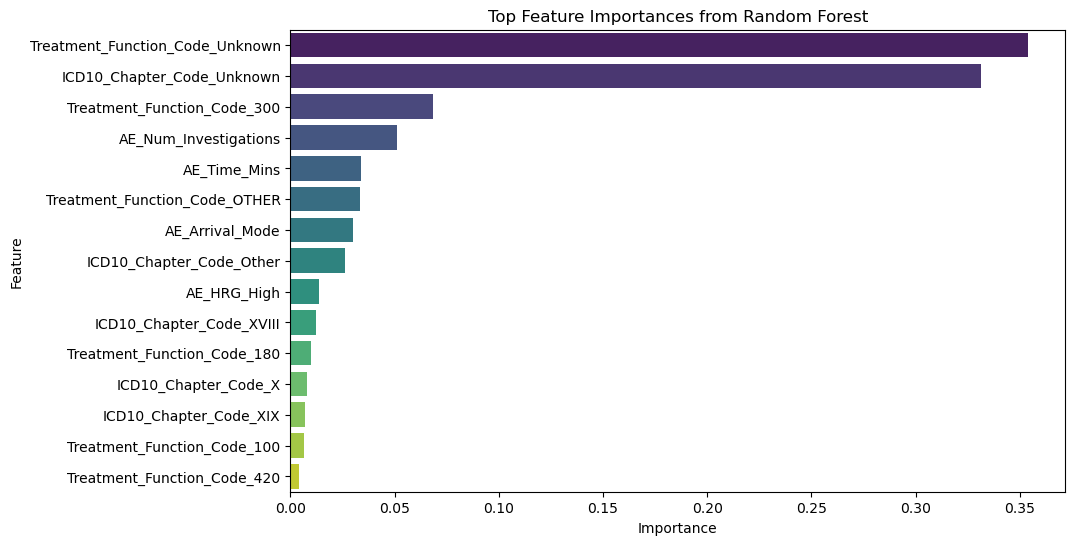

In [69]:

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to associate features with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances from Random Forest')
plt.show()


In [70]:
# 15 top important features from the random forest
rf_features = importance_df['Feature'].head(15).tolist()
rf_features

['Treatment_Function_Code_Unknown',
 'ICD10_Chapter_Code_Unknown',
 'Treatment_Function_Code_300',
 'AE_Num_Investigations',
 'AE_Time_Mins',
 'Treatment_Function_Code_OTHER',
 'AE_Arrival_Mode',
 'ICD10_Chapter_Code_Other',
 'AE_HRG_High',
 'ICD10_Chapter_Code_XVIII',
 'Treatment_Function_Code_180',
 'ICD10_Chapter_Code_X',
 'ICD10_Chapter_Code_XIX',
 'Treatment_Function_Code_100',
 'Treatment_Function_Code_420']

#### Caution
Despite taking precautions to prevent data leakage and performing appropriate scaling, our models consistently demonstrated remarkably high accuracy. Following our analysis of the random forest model, we aim to refine our approach by training a new model using the features selected from the initial model. This step reflects our progression toward improved feature selection.

In [71]:
X_final = X[rf_features]
y = df['Admitted_Flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
rf_model1 = RandomForestClassifier(random_state=42, max_depth = 1, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_model1.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model1.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy4 = accuracy_score(y_test, y_pred)
auc_score4 = roc_auc_score(y_test, y_pred)
f14 = f1_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred)
recall4 = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f14)
print("Precision:", precision4)
print("Recall:", recall4)
print("Accuracy:", accuracy4)
print(f"AUC score: {auc_score4}")
print(X_final.columns)

F1 Score: 0.9983879093198993
Precision: 1.0
Recall: 0.9967810079468866
Accuracy: 0.9983926867245969
AUC score: 0.9983905039734433
Index(['Treatment_Function_Code_Unknown', 'ICD10_Chapter_Code_Unknown',
       'Treatment_Function_Code_300', 'AE_Num_Investigations', 'AE_Time_Mins',
       'Treatment_Function_Code_OTHER', 'AE_Arrival_Mode',
       'ICD10_Chapter_Code_Other', 'AE_HRG_High', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_180', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XIX', 'Treatment_Function_Code_100',
       'Treatment_Function_Code_420'],
      dtype='object')


## 5.4. XGBoost  <a class="anchor" id="5"></a>



[Back to Table of Contents](#0.1)

In [72]:
# XGBoost using our full feature dataset
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred)
f15 = f1_score(y_test, y_pred)
precision5 = precision_score(y_test, y_pred)
recall5 = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy5:.4f}")
print(f"F1 Score: {f15:.4f}")
print(f"Precision: {precision5:.4f}")
print(f"Recall: {recall5:.4f}")
print(X.columns)

Accuracy: 0.9998
F1 Score: 0.9998
Precision: 1.0000
Recall: 0.9997
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown',
       'ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown'],
      dtype='object')


## 5.5. K-Means Clustering  <a class="anchor" id="5"></a>



[Back to Table of Contents](#0.1)


In [73]:

# K-means clustering without our selected features 
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_select = X[selected_feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy6 = accuracy_score(y_test, y_pred)
f16 = f1_score(y_test, y_pred, average='weighted')
precision6 = precision_score(y_test, y_pred, average='weighted')
recall6 = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy6:.4f}")
print(f"F1 Score: {f16:.4f}")
print(f"Precision: {precision6:.4f}")
print(f"Recall: {recall6:.4f}")
print(X.columns)

Accuracy: 0.6489
F1 Score: 0.6489
Precision: 0.6489
Recall: 0.6489
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown',
       'ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown'],
      dtype='object')


In [74]:
# K-means clustering with our selected features
X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_select = X[selected_feature_names]
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=10)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)


# Predict on the test set
y_pred = knn1.predict(X_test)

# Calculate evaluation metrics
accuracy7 = accuracy_score(y_test, y_pred)
f17 = f1_score(y_test, y_pred, average='weighted')
precision7 = precision_score(y_test, y_pred, average='weighted')
recall7 = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy7:.4f}")
print(f"F1 Score: {f17:.4f}")
print(f"Precision: {precision7:.4f}")
print(f"Recall: {recall7:.4f}")
print(X_select.columns)

Accuracy: 0.9752
F1 Score: 0.9752
Precision: 0.9755
Recall: 0.9752
Index(['AE_Time_Mins', 'AE_Num_Investigations', 'AE_Num_Treatments',
       'AE_Arrival_Mode', 'Age_Band_65-84', 'AE_HRG_High', 'AE_HRG_Nothing',
       'ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIX',
       'ICD10_Chapter_Code_XVIII', 'Treatment_Function_Code_100',
       'Treatment_Function_Code_180', 'Treatment_Function_Code_300',
       'Treatment_Function_Code_420', 'Treatment_Function_Code_OTHER'],
      dtype='object')


## 5.6. Deep Neural Network  <a class="anchor" id="5"></a>

Sequential Neural Network

[Back to Table of Contents](#0.1)

In [75]:

X = df.drop('Admitted_Flag', axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_neural = X.values
y_neural = y.values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_neural, y_neural, test_size=0.2, random_state=10)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model_seq = Sequential()
model_seq.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_seq.add(Dense(64, activation='relu'))
model_seq.add(Dense(1, activation='sigmoid'))  # Binary classification (admitted or not)

# Compile the model
model_seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_seq.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy8 = model_seq.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy8:.4f}')


# Predict on the test set
y_pred = model_seq.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate classification metrics
classification_rep = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', classification_rep)
print(X.columns)

Epoch 1/10
1991/1991 [==============================] - 6s 2ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 7.8697e-05 - val_accuracy: 1.0000
Epoch 2/10
1991/1991 [==============================] - 4s 2ms/step - loss: 9.2716e-04 - accuracy: 0.9999 - val_loss: 3.2483e-05 - val_accuracy: 1.0000
Epoch 3/10
1991/1991 [==============================] - 4s 2ms/step - loss: 8.1249e-04 - accuracy: 0.9999 - val_loss: 7.9628e-05 - val_accuracy: 1.0000
Epoch 4/10
1991/1991 [==============================] - 4s 2ms/step - loss: 7.2381e-04 - accuracy: 0.9999 - val_loss: 2.4064e-05 - val_accuracy: 1.0000
Epoch 5/10
1991/1991 [==============================] - 4s 2ms/step - loss: 7.5339e-04 - accuracy: 0.9999 - val_loss: 1.5802e-05 - val_accuracy: 1.0000
Epoch 6/10
1991/1991 [==============================] - 5s 3ms/step - loss: 6.8196e-04 - accuracy: 0.9999 - val_loss: 1.0413e-05 - val_accuracy: 1.0000
Epoch 7/10
1991/1991 [==============================] - 4s 2ms/step - loss: 6.3503e-04 - acc

**Running models after dropping 'Treatment_Function_Code and ICD10CODES**

#### Random Forest classification

In [76]:
drop_features = ['ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Admitted_Flag','Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown']
X_droped = df.drop(columns = drop_features, axis=1)
y = df['Admitted_Flag']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_droped, y, test_size=0.2, random_state=42)
rf_model1_drop = RandomForestClassifier(random_state=42, max_depth = 1, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_model1_drop.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model1_drop.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy4_drop = accuracy_score(y_test, y_pred)
auc_score4_drop = roc_auc_score(y_test, y_pred)
f14_drop = f1_score(y_test, y_pred)
precision4_drop = precision_score(y_test, y_pred)
recall4_drop = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f14_drop)
print("Precision:", precision4_drop)
print("Recall:", recall4_drop)
print("Accuracy:", accuracy4_drop)
print(f"AUC score: {auc_score4_drop}")
print(X_droped.columns)

F1 Score: 0.8099475922080491
Precision: 0.7964025279533301
Recall: 0.8239613720953627
Accuracy: 0.8069214927922045
AUC score: 0.806944570477858
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown'],
      dtype='object')


#### Finding the important features using random forest after icd10 and (Treatment function codes) tfc codes are dropped

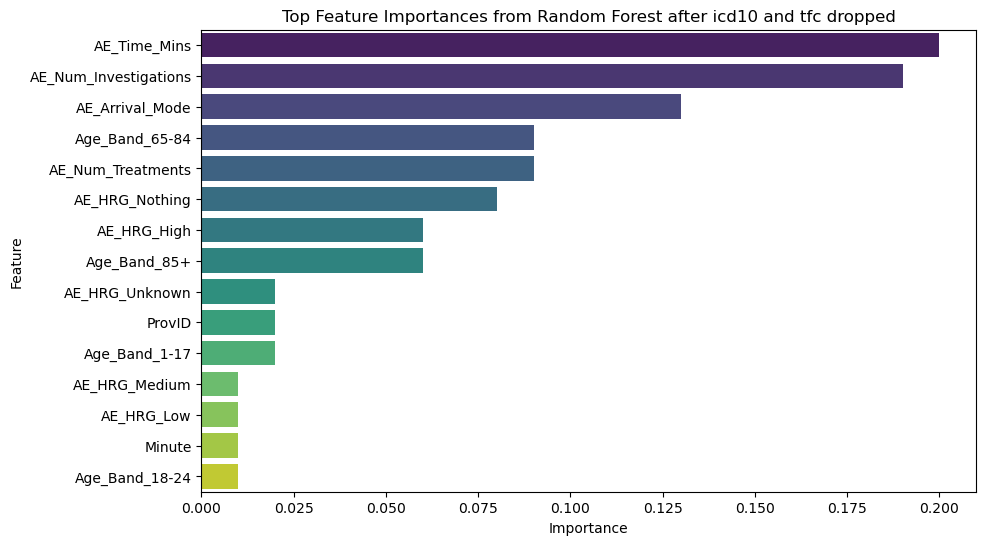

In [77]:

# Get feature importances
feature_importance = rf_model1_drop.feature_importances_

# Create a DataFrame to associate features with their importances
importance_df_drop = pd.DataFrame({'Feature': X_droped.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance
importance_df_drop = importance_df_drop.sort_values(by='Importance', ascending=False)


# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df_drop.head(15), x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances from Random Forest after icd10 and tfc dropped')
plt.show()


In [78]:
# 15 top important features from the random forest
rf_features_drop = importance_df_drop['Feature'].head(20).tolist()
rf_features_drop

['AE_Time_Mins',
 'AE_Num_Investigations',
 'AE_Arrival_Mode',
 'Age_Band_65-84',
 'AE_Num_Treatments',
 'AE_HRG_Nothing',
 'AE_HRG_High',
 'Age_Band_85+',
 'AE_HRG_Unknown',
 'ProvID',
 'Age_Band_1-17',
 'AE_HRG_Medium',
 'AE_HRG_Low',
 'Minute',
 'Age_Band_18-24',
 'Age_Band_25-44',
 'Age_Band_45-64',
 'Sex',
 'Hour',
 'Record_ID']

Training the rf based on these features

In [79]:
X_finalx = X[rf_features_drop]
y = df['Admitted_Flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_finalx, y, test_size=0.2, random_state=42)
rf_model1_dropp = RandomForestClassifier(random_state=42, max_depth = 1, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_model1_dropp.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model1_dropp.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy4_dropp = accuracy_score(y_test, y_pred)
auc_score4_dropp = roc_auc_score(y_test, y_pred)
f14_dropp = f1_score(y_test, y_pred)
precision4_dropp = precision_score(y_test, y_pred)
recall4_dropp = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f14_dropp)
print("Precision:", precision4_dropp)
print("Recall:", recall4_dropp)
print("Accuracy:", accuracy4_dropp)
print(f"AUC score: {auc_score4_dropp}")
print(X_finalx.columns)

F1 Score: 0.809698532328441
Precision: 0.7983768456047717
Recall: 0.821345941052208
Accuracy: 0.8072228640313426
AUC score: 0.8072419913928778
Index(['AE_Time_Mins', 'AE_Num_Investigations', 'AE_Arrival_Mode',
       'Age_Band_65-84', 'AE_Num_Treatments', 'AE_HRG_Nothing', 'AE_HRG_High',
       'Age_Band_85+', 'AE_HRG_Unknown', 'ProvID', 'Age_Band_1-17',
       'AE_HRG_Medium', 'AE_HRG_Low', 'Minute', 'Age_Band_18-24',
       'Age_Band_25-44', 'Age_Band_45-64', 'Sex', 'Hour', 'Record_ID'],
      dtype='object')


#### The accuracy after using these features reduced.

In [80]:
# Logistic reg using the dropped features
drop_features = ['ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Admitted_Flag','Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown']
X_dropped = df.drop(columns = drop_features, axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.2, random_state=10)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model with Ridge regularization
model_l2_drop = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=10)
model_l2_drop.fit(X_train_scaled, y_train)

# Predict the target values
y_pred = model_l2_drop.predict(X_test_scaled) 

# Evaluate the model
accuracy2_drop = model_l2_drop.score(X_test_scaled, y_test)

# Calculate F1 score, precision, and recall
f12_drop = f1_score(y_test, y_pred)
precision2_drop = precision_score(y_test, y_pred)
recall2_drop = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score:", f12_drop)
print("Precision:", precision2_drop)
print("Recall:", recall2_drop)
print("Accuracy:", accuracy2_drop)
print(X_dropped.columns)


F1 Score: 0.8070714834742506
Precision: 0.8227980357329433
Recall: 0.791934835076428
Accuracy: 0.8108895474408558
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown'],
      dtype='object')


In [81]:
# XGBoost using our icd10 and tfc dropped dataset

drop_features = ['ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Admitted_Flag','Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown']
X_droppedg = df.drop(columns = drop_features, axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_droppedg, y, test_size=0.2, random_state=10)


# Creating an XGBoost classifier
xgb_classifier_drop = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Training the model
xgb_classifier_drop.fit(X_train, y_train)

#  predictions 
y_pred = xgb_classifier_drop.predict(X_test)

# Evaluating the model
accuracy5_drop = accuracy_score(y_test, y_pred)
f15_drop = f1_score(y_test, y_pred)
precision5_drop = precision_score(y_test, y_pred)
recall5_drop = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy5_drop:.4f}")
print(f"F1 Score: {f15_drop:.4f}")
print(f"Precision: {precision5_drop:.4f}")
print(f"Recall: {recall5_drop:.4f}")
print(X_droppedg.columns)

Accuracy: 0.8299
F1 Score: 0.8313
Precision: 0.8234
Recall: 0.8394
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown'],
      dtype='object')


In [82]:
# XGBoost using our icd10 and tfc dropped dataset with some hyperparameter tuning

drop_features = ['ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Admitted_Flag','Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown']
X_droppedgx = df.drop(columns = drop_features, axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_droppedgx, y, test_size=0.2, random_state=10)



xgb_classifier_dropp =xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=10
)



xgb_classifier_dropp.fit(X_train, y_train)


y_pred = xgb_classifier_dropp.predict(X_test)

# Evaluaing the model
accuracy5_dropp = accuracy_score(y_test, y_pred)
f15_dropp = f1_score(y_test, y_pred)
precision5_dropp = precision_score(y_test, y_pred)
recall5_dropp = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy5_dropp:.4f}")
print(f"F1 Score: {f15_dropp:.4f}")
print(f"Precision: {precision5_dropp:.4f}")
print(f"Recall: {recall5_dropp:.4f}")
print(X_droppedgx.columns)


Accuracy: 0.8312
F1 Score: 0.8324
Precision: 0.8259
Recall: 0.8389
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Time_Mins', 'AE_Num_Diagnoses',
       'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown'],
      dtype='object')


In [83]:
# Sequential neural network with icd and tfc dropped
drop_features = ['ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100', 'Admitted_Flag','Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown']
X_droppedn = df.drop(columns = drop_features, axis=1)
y = df['Admitted_Flag']

X_neural = X_droppedn.values
y_neural = y.values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_neural, y_neural, test_size=0.2, random_state=10)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model_seq_drop = Sequential()
model_seq_drop.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_seq_drop.add(Dense(64, activation='relu'))
model_seq_drop.add(Dense(1, activation='sigmoid'))  # Binary classification (admitted or not)

# Compile the model
model_seq_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_seq_drop.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy8 = model_seq_drop.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy8:.4f}')


# Predict on the test set
y_pred = model_seq_drop.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate classification metrics
classification_rep = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', classification_rep)
print(X_neural)

Epoch 1/10
1991/1991 [==============================] - 5s 2ms/step - loss: 0.4265 - accuracy: 0.8116 - val_loss: 0.4190 - val_accuracy: 0.8150
Epoch 2/10
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4130 - accuracy: 0.8204 - val_loss: 0.4150 - val_accuracy: 0.8162
Epoch 3/10
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4094 - accuracy: 0.8210 - val_loss: 0.4108 - val_accuracy: 0.8174
Epoch 4/10
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4064 - accuracy: 0.8241 - val_loss: 0.4096 - val_accuracy: 0.8166
Epoch 5/10
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4036 - accuracy: 0.8247 - val_loss: 0.4103 - val_accuracy: 0.8178
Epoch 6/10
1991/1991 [==============================] - 4s 2ms/step - loss: 0.4015 - accuracy: 0.8256 - val_loss: 0.4087 - val_accuracy: 0.8181
Epoch 7/10
1991/1991 [==============================] - 4s 2ms/step - loss: 0.3993 - accuracy: 0.8265 - val_loss: 0.4081 - val_accuracy:

Drawing insights from our data dictionary and the exploratory analysis, certain columns raise concerns about potential data leakage. Specifically, columns such as 'AE_time_Mins', which might signify the duration of patients' stay in the emergency department, as well as 'AE_Num_Diagnoses', 'AE_Num_Investigations', and 'AE_Num_Treatments', might only become known after the outcome (admitted or not) is realized.

The provided definitions from both the data dictionary and external sources lack sufficient information regarding the possible timing of these investigations and treatments. Ambiguities in definitions have further complicated matters. Despite these challenges, referencing similar work [1][2] where the utilization of investigation and ICD10 codes played a crucial role in their predictions, we decided to incorporate these features into our model training. 

However, during this conclusive phase of our modeling, we are deliberately excluding these contentious columns and using only XGBoost – our best model to train.

In [84]:
# XGBoost using after dropping all contentious columns 

dropp_features = ['ICD10_Chapter_Code_IX', 'ICD10_Chapter_Code_Other',
       'ICD10_Chapter_Code_Unknown', 'ICD10_Chapter_Code_X',
       'ICD10_Chapter_Code_XI', 'ICD10_Chapter_Code_XIV',
       'ICD10_Chapter_Code_XIX', 'ICD10_Chapter_Code_XVIII',
       'Treatment_Function_Code_100','Treatment_Function_Code_180',
       'Treatment_Function_Code_300', 'Treatment_Function_Code_420',
       'Treatment_Function_Code_OTHER', 'Treatment_Function_Code_Unknown','AE_Num_Diagnoses',
        'AE_Num_Investigations', 'AE_Num_Treatments', 'AE_Time_Mins', 'Admitted_Flag']
X_cont_drop = df.drop(columns = dropp_features, axis=1)
y = df['Admitted_Flag']
X_train, X_test, y_train, y_test = train_test_split(X_cont_drop, y, test_size=0.2, random_state=10)



xgb_classifier_cont_drop =xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=10
)

xgb_classifier_cont_drop.fit(X_train, y_train)


y_pred = xgb_classifier_cont_drop.predict(X_test)

# Evaluaing the model
accuracy5_cont_drop = accuracy_score(y_test, y_pred)
f15_cont_drop = f1_score(y_test, y_pred)
precision5_cont_drop = precision_score(y_test, y_pred)
recall5_cont_drop = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy5_cont_drop:.4f}")
print(f"F1 Score: {f15_cont_drop:.4f}")
print(f"Precision: {precision5_cont_drop:.4f}")
print(f"Recall: {recall5_cont_drop:.4f}")
print(X_cont_drop.columns)


Accuracy: 0.7790
F1 Score: 0.7711
Precision: 0.7986
Recall: 0.7455
Index(['IMD_Decile_From_LSOA', 'Sex', 'AE_Arrival_Mode',
       'Provider_Patient_Distance_Miles', 'ProvID', 'Record_ID', 'Hour',
       'Minute', 'Age_Band_1-17', 'Age_Band_18-24', 'Age_Band_25-44',
       'Age_Band_45-64', 'Age_Band_65-84', 'Age_Band_85+', 'AE_HRG_High',
       'AE_HRG_Low', 'AE_HRG_Medium', 'AE_HRG_Nothing', 'AE_HRG_Unknown'],
      dtype='object')


### Summary 



### Model Training

Our model training process was conducted over three distinct batches, each involving variations in feature selection and model specifications. The aim of this approach was to comprehensively explore the impact of different feature sets on model performance.

### Batch 1: Initial Feature Selection

In the first batch of model training, we employed a meticulous feature selection process. We utilized the K-Best feature selection method in combination with a correlation matrix to identify a subset of features with the highest predictive potential. These selected features were then used as inputs for various machine learning algorithms, including ensemble models such as XGBoost and Random Forests.

For the ensemble models, we adopted a comprehensive approach by including all available features. This allowed us to observe the impact of incorporating the entire feature space on model performance. At the end of each model training iteration, a summary of the specific features used for each model was shown.

### Batch 2: Feature Exclusion

In the second batch of model training, we explored the effects of excluding specific features from the dataset. Notably, we removed the ICD10 and TFC codes, which were identified as potentially having a significant impact on model outcomes. 

### Batch 3: Outcome-Guided Feature Removal

In the final batch, we experimented with excluding features that could be derived post-outcome to gauge the impact of pre-outcome information.

For transparency, we detailed the features used in each model, allowing for accurate replication and result comparison.



# **6. Results** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

### GRAPH FOR MODEL RESULTS BEFORE TFC AND ICD10 COLUMNS WERE DROPPED

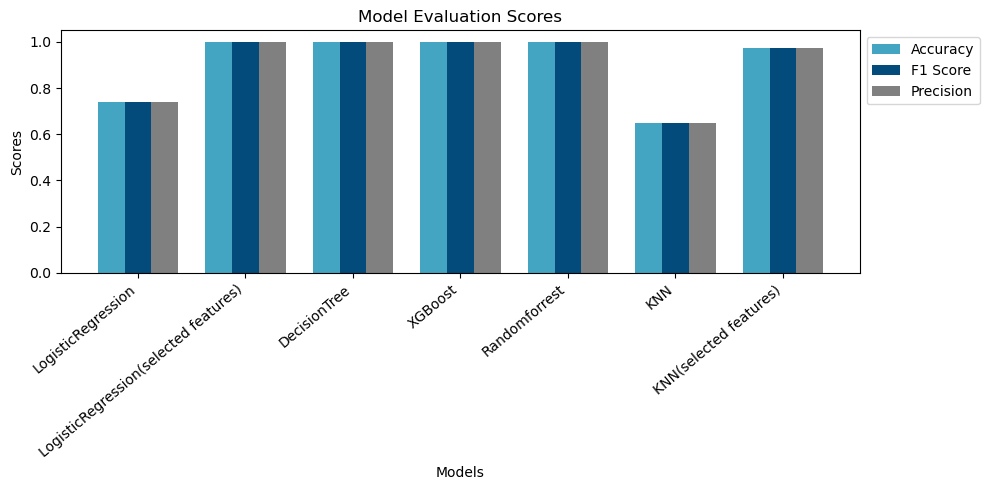

In [85]:
# PLOTTING THE GRAPH FOR MODEL RESULTS BEFORE TFC AND ICD10 CODES COLUMNS ARE DROPPED

# List of model names
model_names = [model_l,model_l2,clf_dt,rf_model1,xgb_classifier,knn,knn1]

# List of accuracy scores for each model
accuracy_scores = [accuracy1,accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7]

# List of F1 scores for each model
f1_scores = [f11, f12, f13, f14, f15, f16, f17]

# List of precision scores for each model
precision_scores = [precision1, precision2, precision3, precision4, precision5, precision6, precision7]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Bar width
bar_width = 0.25


# Positions for the bars
positions = np.arange(len(model_names))

# Bar plots for accuracy, F1 score, and precision
ax.bar(positions - bar_width, accuracy_scores, width=bar_width, label='Accuracy',color="#44a5c2")
ax.bar(positions, f1_scores, width=bar_width, label='F1 Score',color="#024b7a")
ax.bar(positions + bar_width, precision_scores, width=bar_width, label='Precision',color='grey')
models_names = ['LogisticRegression', 'LogisticRegression(selected features)', 'DecisionTree', 'XGBoost', 'Randomforrest', 'KNN', 'KNN(selected features)']
# Set the x-axis labels and title
ax.set_xticks(positions)
ax.set_xticklabels(models_names, rotation=40, ha='right')  # Display model names
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Scores')

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

### THE GRAPH FOR MODEL RESULTS AFTER TFC AND ICD10 CODES WERE DROPPED

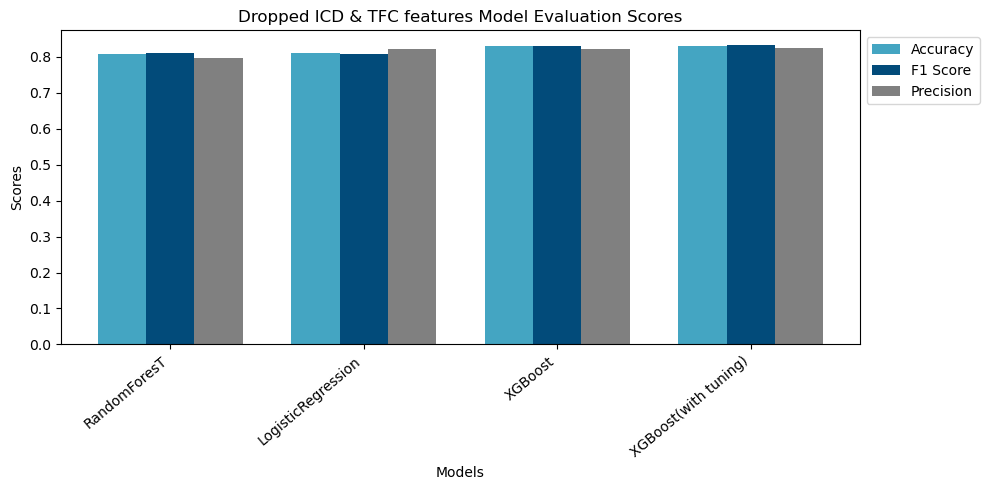

In [86]:
# PLOTTING THE GRAPH FOR MODEL RESULTS AFTER TFC AND ICD10 CODE ARE DROPPED

# List of model names
model_names = [rf_model1_drop,model_l2_drop,xgb_classifier_drop,xgb_classifier_dropp]

# List of accuracy scores for each model
accuracy_scores = [accuracy4_drop,accuracy2_drop, accuracy5_drop, accuracy5_dropp]

# List of F1 scores for each model
f1_scores = [f14_drop, f12_drop, f15_drop, f15_dropp]

# List of precision scores for each model
precision_scores = [precision4_drop, precision2_drop, precision5_drop, precision5_dropp]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Bar width
bar_width = 0.25


# Positions for the bars
positions = np.arange(len(model_names))

# Bar plots for accuracy, F1 score, and precision
ax.bar(positions - bar_width, accuracy_scores, width=bar_width, label='Accuracy',color="#44a5c2")
ax.bar(positions, f1_scores, width=bar_width, label='F1 Score',color="#024b7a")
ax.bar(positions + bar_width, precision_scores, width=bar_width, label='Precision',color='grey')
models_names = ['RandomForesT', 'LogisticRegression','XGBoost', 'XGBoost(with tuning)']
# Set the x-axis labels and title
ax.set_xticks(positions)
ax.set_xticklabels(models_names, rotation=40, ha='right')  # Display model names
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Dropped ICD & TFC features Model Evaluation Scores')

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

#### Commentary

- The outcomes of our initial training phase unveiled remarkable achievements in terms of accuracy, precision, and F1 scores. Notably, these accomplishments were most pronounced when we integrated specific influential features, such as ICD10 and TFC (Treatment Function Code), into our models. The results underscored the significance of these features in enhancing our predictive capabilities.

- Upon conducting a meticulous analysis and subsequently excluding these influential features, the ensuing models continued to display commendable performance. The application of XGBoost, for instance, yielded a striking accuracy of 83.23%, signifying its robustness in the absence of specific features.

- Subsequently, we ventured into a phase of model training where all contentious columns were selectively removed. Despite this nuanced adjustment, the accuracy persevered at a respectable 77.87%. These findings, offering a glimpse into the model's adaptability under diverse circumstances, hold profound implications. They illuminate the model's efficacy in scenarios where comprehensive diagnostic and treatment data might be scarce, yet reliable predictions remain a priority.

While our model's strong predictive abilities are evident, it's crucial to consider the bigger picture. Taking a closer look at how time-related factors affect its accuracy is vital, following the standards of data science.

In summary, these outcomes emphasize the reliability of our model. It demonstrates its capability to perform well even in diverse situations, effectively predicting admission chances. 

# **7. Features with the highest co-efficients** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

We will present the selected features from our k-best, correlation matrix, random forest with all features, as well as random forest analyses after excluding the ICD-10 codes and treatment function codes.

### Important features using K-Best
'Age_Band_5',
 'AE_Time_Mins',
 'AE_HRG_2',
 'AE_HRG_3',
 'AE_Num_Investigations',
 'AE_Num_Treatments',
 'AE_Arrival_Mode',
 'ICD10_Chapter_Code
 'Treatment_Function_Code'
 


### Important features from the Correlation Matrix
 'IMD_Decile_From_LSOA', 'Age_Band, 'Sex', 'AE_Time_Mins',
'AE_HRG, 'AE_Num_Diagnoses', 'AE_Num_Investigations', 'AE_Num_Treatments',
'AE_Arrival_Mode', 'Provider_Patient_Distance_Miles', 'ProvID',
'ICD10_Chapter_Code,'Treatment_Function_Code, 'Hour'

### Important features from the random forest model after using all features to train the model

'Treatment_Function_Code',
 'ICD10_Chapter_Code',
 'AE_Time_Mins',
 'AE_Num_Investigations',
 'AE_Arrival_Mode',
 'AE_HRG',
 

### Important features from the random forest after dropping the ICD10 & TFC codes

 
 
 'AE_HRG',
 'AE_Time_Mins',
 'AE_Num_Investigations',
 'AE_Arrival_Mode',
 'AE_Num_Treatments',
 'Age_Band',
 'ProvID',
 'Hour',
 'Provider_Patient_Distance_Miles',
 'IMD_Decile_From_LSOA',
 'AE_Num_Diagnoses',
 

# **8. Additional stretch of our model using Streamlit** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


We employed the open-source app framework called Streamlit to design an application for our model. Within this app, users can input parameters, and our random forest model leverages these inputs to predict whether a patient will be admitted or not. For this specific project, the app employs the crucial features identified by the random forest model, including contentious ones. Nevertheless, as we have extensively explored, a subset of these values might not be promptly accessible in real-time scenarios, rendering their immediate utility limited. However, if provided with the requisite data, we are fully prepared to construct a framework that can effectively complement nurses and other medical professionals in streamlining and enhancing their triage processes.

Our app also has the potential for future enhancements. It could help identify patients needing urgent attention based on the Manchester triage (MTS) system -this system provides real-time insights into patient acuity in the emergency department. For critical cases, the app could send alerts for immediate treatment. It might also have the capability to quickly detect potential infections upon patient arrival. 
However, it's important to note that achieving these features would likely require additional data beyond what we currently have available.

You can access the app through this link: https://ehwuzkrztweohtsbysco7q.streamlit.app/

This is a picture for your Reference: 

<img width="769" alt="Screenshot 2023-08-17 at 01 19 58" src="https://github.com/pearlroys/Group_8/assets/103274172/c00614e7-354b-4256-88ce-4571de6dbc3c">


<img width="766" alt="Screenshot 2023-08-17 at 01 19 39" src="https://github.com/pearlroys/Group_8/assets/103274172/4a52efff-ea9a-4be7-a759-23271a05545f">


# **9. Discussion** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Our study aimed to develop a model capable of predicting the need for hospital admission using common data available in the emergency department (ED). Our findings highlighted age as a significant influencer of admission rates, consistent with prior research. However, we observed the absence of key details in our dataset, such as specific medical tests like biochemical markers and coagulation tests, which are integral in similar studies. These omissions could have impacted prediction accuracy. Interestingly, using ICD codes and patient comorbidities in our models led to unusually high accuracy, deviating from results seen in other research.

While logistic regression is widely used for admission prediction, we took a more exploratory approach by incorporating alternative methods to enhance accuracy. To address overfitting concerns, we utilized techniques like Lasso regularization, random forests, gradient boosting, and neural networks. For example, Lasso regularization aids in feature selection and mitigates overfitting. Employing random forests introduces diverse decision trees, while gradient boosting fine-tunes precision. Neural networks excel at deciphering complex patterns through deep learning.

A notable consideration in our study was determining the optimal timing for using our predictive model. We deliberated whether the model's effectiveness would be higher upon a patient's immediate arrival or if it would be more valuable when applied slightly later during their stay in the emergency department (ED) when more tests and investigations have been done.

In summary, the true strength of our tool lies in its ability to provide reliable predictions using simple data collected during an ED visit. Despite acknowledging limitations due to missing details like specific codes and tests, our tool underscores the potential of utilizing everyday data to empower healthcare professionals in making informed decisions.

# **10. Limitations** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)


Some of the limitations of our work include:
- Firstly, the quality and completeness of our dataset. The accuracy of our model is intricately linked to the reliability of the data it's built upon. Inaccurate or incomplete information could potentially skew our predictions, leading to misinformed conclusions. The synthetic nature of our dataset is a cause for consideration. We lack certainty about how closely it mirrors real-life scenarios. This uncertainty adds an extra layer of complexity in interpreting the model's applicability in real-world healthcare settings.

- Secondly, our model's assumption that certain codes are determined post-outcome introduces an element of uncertainty. While this assumption aligns with our initial understanding, it might not hold true in all cases. This potential misclassification of outcome-related features could introduce bias into our model's predictions.

- Additionally, our model identifies correlations between features and outcomes, it's however important to distinguish between correlation and causation. Complex medical scenarios often involve a multitude of factors, and our model's insights should be interpreted with a cautious eye, considering the possibility of confounding variables that might not be within its scope.

- Furthermore, while our model shows promise within the confines of our current dataset, it's crucial to consider its generalizability. Healthcare practices, patient demographics, and other variables can vary significantly between different contexts. What works well in one setting might not necessarily translate seamlessly to another, prompting the need for cautious interpretation and validation in diverse scenarios.

- The ever-changing nature of healthcare practices also poses a challenge to the longevity of our model's effectiveness. As protocols evolve and patient profiles shift, continuous updates and adaptations will be necessary to ensure our model remains relevant and reliable.information.

In summary, understanding and acknowledging these limitations is crucial for responsible and informed utilization of our model in practical healthcare settings. While our work holds promise, it's essential to approach its implementation with a clear understanding of its boundaries and potential impact. 
Commendably, we accomplished creating predictive models using a limited set of predictors that are routinely available at current ED triage settings.



# **11. Business/Health Impact** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)





**Business and Health Impact:**
Our predictive model holds the potential to create a significant positive impact on both healthcare operations and patient outcomes. 

**Cost Impact and Savings:**
Our model's potential to reduce overtriage is particularly relevant. Each trip to the A&E costs the NHS £419, even before any specialized treatment. This cost escalates by almost £300 to £722 if the patient requires an overnight hospital bed. By accurately predicting admission probabilities, our model has the capacity to mitigate overtriage instances, thereby potentially leading to substantial cost savings. Not only would this positively impact the healthcare system's financial efficiency, but it would also alleviate the strain on resources and bed availability.

**Efficiency in Admission and Resource Management:**
One of the significant benefits of our model is its potential to reduce bed blocking. The model's enhanced accuracy in predicting patients fit for admission can prevent unnecessary delays, ensuring that patients who require hospitalization are promptly admitted. This streamlined process could contribute to considerable savings by optimizing bed utilization and reducing congestion within healthcare facilities.

**Supporting Triage Nurses:**
It's important to emphasize that our model is designed to complement and enhance the work of triage nurses, not replace it. The model's capabilities could empower nurses to allocate their efforts more efficiently, leveraging the predictive insights to prioritize patients based on the acuity of their condition. This not only enhances patient care but also facilitates a more organized and effective workflow for the nursing team.

- As we assess its potential benefits, it's worth noting that similar systems, like eTriage [8], have showcased impressive results. For instance, the implementation of eTriage has led to a remarkable 11-minute reduction in pre-registration queue wait times during busy Emergency Department (ED) periods. Additionally, there has been a notable 14% reduction in nurse triage assessment duration, streamlining the patient assessment process.The impact on staff and patient experience is equally noteworthy. The data reveals that eTriage has garnered positive feedback, with 100% of staff attesting to its positive impact on patient flow and safety. Furthermore, 82% of staff have expressed increased efficiency in performing their roles with the aid of eTriage.

In conclusion, our predictive model has the potential to bring about transformative changes in healthcare operations and patient care. By reducing overtriage, optimizing resource allocation, and supporting healthcare professionals, our model aims to contribute to improved patient outcomes and a more efficient healthcare system.

# **12. Conclusion** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


In summary, our study focused on developing a predictive model for hospital admissions using readily available patient data in the emergency department (ED). While certain key elements used in similar studies were absent from our dataset, we explored alternative models beyond conventional logistic regression, achieving enhanced accuracy.

One of the standout features of our tool is its practicality, leveraging easily accessible information. Despite challenges in determining the optimal deployment time, its strength lies in delivering reliable predictions using straightforward data. Moreover, the potential benefits of our model extend to substantial cost impact and savings within healthcare settings.

# **13. Submission** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

For our submission, we will utilize the XGBoost model with all available features since it demonstrated the highest performance. While we acknowledge that this might not be feasible in practical scenarios, our goal is to secure victory in this competition by leveraging the best-performing model.

In [87]:
test = pd.read_csv('/kaggle/input/bip-ae-technical-challenge/test_set.csv')
test.head(10)

,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Arrive_Date,AE_Arrive_HourOfDay,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,ICD10_Chapter_Code,Treatment_Function_Code,Length_Of_Stay_Days,Record_ID
0,1.0,18-24,2.0,2014-09-19T00:00:00Z,01-04,590,High,2,10,7,1,2.0,15185,XVIII,300,0.0,713682
1,3.0,18-24,1.0,2015-10-14T00:00:00Z,21-24,40,Low,0,1,1,2,1.0,15267,NaN,NaN,NaN,24630
2,8.0,45-64,1.0,2014-11-14T00:00:00Z,05-08,410,Medium,0,4,1,1,12.0,15321,Other,OTHER,16.0,164668
3,9.0,25-44,1.0,2014-07-05T00:00:00Z,17-20,140,Low,1,1,2,2,7.0,15130,NaN,NaN,NaN,682432
4,1.0,25-44,1.0,2016-06-19T00:00:00Z,09-12,70,Low,1,10,1,2,1.0,15207,NaN,NaN,NaN,937670
5,6.0,25-44,2.0,2016-09-13T00:00:00Z,13-16,230,Medium,1,5,1,1,186.0,15201,NaN,NaN,NaN,114127
6,6.0,45-64,2.0,2016-05-06T00:00:00Z,21-24,230,Medium,1,2,4,1,11.0,15293,X,300,1.0,896240
7,5.0,45-64,1.0,2018-03-02T00:00:00Z,01-04,10,Nothing,0,1,1,2,0.0,15186,NaN,NaN,NaN,254548
8,4.0,18-24,2.0,2016-11-19T00:00:00Z,17-20,10,Nothing,1,0,1,2,2.0,15100,NaN,NaN,NaN,457601
9,2.0,1-17,1.0,2017-01-10T00:00:00Z,09-12,70,Medium,1,1,5,2,1.0,15109,NaN,NaN,NaN,175662


In [88]:
test = clean_df(test)
test

,IMD_Decile_From_LSOA,Age_Band,Sex,AE_Time_Mins,AE_HRG,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,ICD10_Chapter_Code,Treatment_Function_Code,Record_ID,Hour,Minute
0,1.0,18-24,2.0,590,High,2,10,7,1,2.0,15185,XVIII,300,713682,1.0,4.0
1,3.0,18-24,1.0,40,Low,0,1,1,2,1.0,15267,Unknown,Unknown,24630,21.0,24.0
2,8.0,45-64,1.0,410,Medium,0,4,1,1,12.0,15321,Other,OTHER,164668,5.0,8.0
3,9.0,25-44,1.0,140,Low,1,1,2,2,7.0,15130,Unknown,Unknown,682432,17.0,20.0
4,1.0,25-44,1.0,70,Low,1,10,1,2,1.0,15207,Unknown,Unknown,937670,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,25-44,1.0,240,Medium,1,6,4,1,2.0,15361,XIX,300,522851,17.0,20.0
49996,5.0,85+,2.0,220,High,1,8,7,1,1.0,15170,XI,100,518037,13.0,16.0
49997,2.0,45-64,2.0,180,Low,1,1,1,2,6.0,15336,Unknown,Unknown,908119,13.0,16.0
49998,4.0,25-44,2.0,130,Unknown,0,0,0,2,2.0,15297,Unknown,Unknown,425915,17.0,20.0


In [89]:
test.isnull().sum() 

IMD_Decile_From_LSOA               124
Age_Band                             0
Sex                                  0
AE_Time_Mins                         0
AE_HRG                               0
AE_Num_Diagnoses                     0
AE_Num_Investigations                0
AE_Num_Treatments                    0
AE_Arrival_Mode                      0
Provider_Patient_Distance_Miles    124
ProvID                               0
ICD10_Chapter_Code                   0
Treatment_Function_Code              0
Record_ID                            0
Hour                               230
Minute                             230
dtype: int64

In [90]:
test = pd.get_dummies(test, columns=['Age_Band', 'AE_HRG', 'ICD10_Chapter_Code', 'Treatment_Function_Code'])

In [91]:
preds_test = xgb_classifier.predict(test)
preds_test

array([1, 0, 1, ..., 0, 0, 0])

In [92]:
test

,IMD_Decile_From_LSOA,Sex,AE_Time_Mins,AE_Num_Diagnoses,AE_Num_Investigations,AE_Num_Treatments,AE_Arrival_Mode,Provider_Patient_Distance_Miles,ProvID,Record_ID,...,ICD10_Chapter_Code_XI,ICD10_Chapter_Code_XIV,ICD10_Chapter_Code_XIX,ICD10_Chapter_Code_XVIII,Treatment_Function_Code_100,Treatment_Function_Code_180,Treatment_Function_Code_300,Treatment_Function_Code_420,Treatment_Function_Code_OTHER,Treatment_Function_Code_Unknown
0,1.0,2.0,590,2,10,7,1,2.0,15185,713682,...,0,0,0,1,0,0,1,0,0,0
1,3.0,1.0,40,0,1,1,2,1.0,15267,24630,...,0,0,0,0,0,0,0,0,0,1
2,8.0,1.0,410,0,4,1,1,12.0,15321,164668,...,0,0,0,0,0,0,0,0,1,0
3,9.0,1.0,140,1,1,2,2,7.0,15130,682432,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1.0,70,1,10,1,2,1.0,15207,937670,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,1.0,240,1,6,4,1,2.0,15361,522851,...,0,0,1,0,0,0,1,0,0,0
49996,5.0,2.0,220,1,8,7,1,1.0,15170,518037,...,1,0,0,0,1,0,0,0,0,0
49997,2.0,2.0,180,1,1,1,2,6.0,15336,908119,...,0,0,0,0,0,0,0,0,0,1
49998,4.0,2.0,130,0,0,0,2,2.0,15297,425915,...,0,0,0,0,0,0,0,0,0,1


In [93]:
output = pd.DataFrame({'Record_ID': test['Record_ID'],
                       'Admitted_Flag': preds_test})

# output = output.reset_index(drop=True, inplace=True)

output.to_csv('submission.csv', index=False)

# **14. References** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

Some of the work done in this project were inspired from the following Publications, Inputs and websites:-



[1] Feretzakis G, Karlis G, Loupelis E, Kalles D, Chatzikyriakou R, Trakas N, Karakou E, Sakagianni A, Tzelves L, Petropoulou S, Tika A, Dalainas I, Kaldis V. Using Machine Learning Techniques to Predict Hospital Admission at the Emergency Department. J Crit Care Med (Targu Mures). 2022 May 12;8(2):107-116. doi: 10.2478/jccm-2022-0003. PMID: 35950158; PMCID: PMC9097643.

[2] Raita Y, Goto T, Faridi MK, Brown DFM, Camargo CA Jr, Hasegawa K. Emergency department triage prediction of clinical outcomes using machine learning models. Crit Care. 2019 Feb 22;23(1):64. doi: 10.1186/s13054-019-2351-7. PMID: 30795786; PMCID: PMC6387562.

[3] Levin S, Toerper M, Hamrock E, Hinson JS, Barnes S, Gardner H, Dugas A, Linton B, Kirsch T, Kelen G. Machine-Learning-Based Electronic Triage More Accurately Differentiates Patients With Respect to Clinical Outcomes Compared With the Emergency Severity Index. Ann Emerg Med. 2018 May;71(5):565-574.e2. doi: 10.1016/j.annemergmed.2017.08.005. Epub 2017 Sep 6. PMID: 28888332.

[4] https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook#7.

[5] https://www.datadictionary.nhs.uk/attributes/treatment_function_code.html

[6] https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-sets/emergency-care-data-set-ecds/user-guide/data-group-emergency-care-attendance-activity-characteristics#5-9-8-emergency-care-arrival-date-and-emergency-care-arrival-time

[7] The remarkable data science team at Bupa played an integral role in shaping the discussion and limitation part of this work. After presenting our work, they gave us the idea to talk about how this project could affect both businesses and people's health. They pointed out that our app wouldn't really be helpful unless we talked about how it could be useful for businesses and the wider health service.

[8] https://econsult.net/urgent-care